# <center><span style="background: linear-gradient(90deg, #43a047, #009688); padding: 6px 18px; border-radius: 6px; color: white; font-weight: bold;">Human Stress Detection: An End-to-End Analysis</span> </center>


![stress](https://thinkaheadsheffield.wordpress.com/wp-content/uploads/2021/04/brown-and-cream-motivational-blog-banner-1.png)

Welcome to this in-depth analysis of human stress! In this notebook, we embark on a complete journey from raw data to a fully interpretable machine learning model. Our goal is not just to predict stress levels, but to understand the complex interplay of lifestyle, occupational, and biomedical factors that contribute to them.

---

### <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-weight: bold;">Notebook Workflow</span>
This project is structured to follow a standard, rigorous data science pipeline. Here's a step-by-step guide to what you'll find below:

1.  **Exploratory Data Analysis (EDA):** We'll begin by dissecting the dataset to understand its structure, visualize feature distributions, and uncover initial relationships.

2.  **Feature Engineering:** This is a critical stage where we move beyond the raw data. We will create powerful new features like **`sleep_efficiency`** and strategically group the 169 unique **`Occupation`** categories into manageable, meaningful groups.

3.  **Data Preprocessing:** We'll clean the data, handle categorical features using One-Hot Encoding, and scale our numerical features with a Standard Scaler to prepare them for modeling.

4.  **Model Building:** A **Random Forest Classifier** will be trained to learn the patterns from our processed data and predict stress levels.

5.  **Model Evaluation:** We'll assess our model's performance on unseen test data using a confusion matrix and key classification metrics.

6.  **Model Interpretation (XAI):** Finally, we'll use **SHAP (SHapley Additive exPlanations)** to open up the "black box" and understand exactly *why* our model makes its predictions, revealing the true drivers of stress.

---

### <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-weight: bold;">Project Aim</span>
Our primary objectives for this analysis are:

* To build a robust and accurate machine learning model capable of classifying stress into **Low, Medium, and High** categories.
* To identify the most significant lifestyle, biomedical, and occupational factors that predict stress.
* To demonstrate how thoughtful **feature engineering** can dramatically improve model performance and provide deeper insights.
* To deliver a final model that is not only accurate but also fully **interpretable** using modern Explainable AI (XAI) techniques.

>Let's begin our deep dive into the data!

In [70]:
!pip install numpy pandas matplotlib plotly seaborn ydata-profiling scipy scikit-learn ipython nbformat
!pip install --upgrade ydata-profiling
!python -m pip install --upgrade pip
!python -m pip install --upgrade setuptools wheel
!python -m pip install --upgrade ydata-profiling

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;"> Importing Libraries  </span> </center>


In [71]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
import scipy.stats as stats
from IPython.display import IFrame, display

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.io as pio

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;"> Reading & Analysing Data </span> </center>


In [72]:
df = pd.read_csv('./extended_stress_detection_data.csv')
df.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,...,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection
0,30.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
1,35.0,Female,Marketing Manager,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,...,No,9.0,2.0,3.0,No,Yoga,110.0,160.0,80.0,Medium
2,40.0,Male,Data Scientist,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Strength Training,130.0,200.0,100.0,High
3,35.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
4,29.0,Female,Teacher,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,...,No,7.0,1.0,4.0,Yes,Yoga,110.0,180.0,90.0,Low


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3000 non-null   float64
 1   Gender               3000 non-null   object 
 2   Occupation           3000 non-null   object 
 3   Marital_Status       3000 non-null   object 
 4   Sleep_Duration       3000 non-null   float64
 5   Sleep_Quality        3000 non-null   float64
 6   Wake_Up_Time         3000 non-null   object 
 7   Bed_Time             3000 non-null   object 
 8   Physical_Activity    3000 non-null   float64
 9   Screen_Time          3000 non-null   float64
 10  Caffeine_Intake      3000 non-null   int64  
 11  Alcohol_Intake       3000 non-null   int64  
 12  Smoking_Habit        3000 non-null   object 
 13  Work_Hours           3000 non-null   float64
 14  Travel_Time          3000 non-null   float64
 15  Social_Interactions  3000 non-null   f

In [74]:
df.describe()

,Age,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,Travel_Time,Social_Interactions,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.846530,6.317590,3.871413,2.959787,4.064293,1.807667,0.875333,8.249623,2.836517,3.175870,138.011590,220.734257,111.690300
std,7.586693,1.137913,0.989186,1.180590,1.167995,0.825168,0.663278,1.354493,1.371720,1.224617,13.160897,18.976226,12.323205
min,16.980000,1.920000,0.520000,-1.340000,-0.440000,0.000000,0.000000,3.280000,-1.670000,-0.820000,109.130000,150.000000,78.250000
25%,33.097500,5.700000,3.220000,2.097500,3.210000,1.000000,0.000000,7.310000,1.960000,2.260000,126.600000,210.437500,104.890000
50%,38.735000,6.300000,3.900000,3.000000,4.000000,2.000000,1.000000,8.050000,2.970000,3.040000,137.020000,220.525000,113.930000
75%,44.470000,7.000000,4.430000,3.852500,5.000000,2.000000,1.000000,9.000000,4.000000,4.000000,149.942500,230.522500,120.000000
max,60.840000,10.160000,7.730000,7.210000,8.640000,4.000000,2.000000,14.000000,7.270000,7.500000,170.000000,290.000000,151.670000


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Pandas Profiling</span> </center>


In [75]:
report = ProfileReport(df)
report.to_file("ydata_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 128.47it/s]


In [76]:
print(df['Stress_Detection'].value_counts())

Stress_Detection
Medium    1258
High      1118
Low        624
Name: count, dtype: int64


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Categorical Features EDA</span> </center>


Gender
Female    1521
Male      1479
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

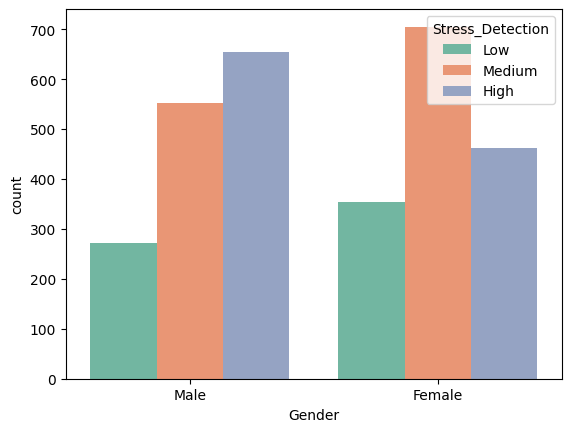

In [77]:
print(df['Gender'].value_counts())
sns.countplot(data=df,x=df['Gender'],hue=df['Stress_Detection'],palette = 'Set2')

In [78]:
print(f"total number of occupation : {df['Occupation'].nunique()}")
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']
print(occupation_counts.head())

total number of occupation : 169
     Occupation  Count
0       Teacher    140
1          Chef    108
2  Photographer     86
3         Nurse     86
4     Architect     74


In [79]:
fig_treemap = px.treemap(
    occupation_counts,
    path=[px.Constant("All Occupations"), 'Occupation'],
    values='Count',
    color='Count',
    color_continuous_scale='YlGnBu',
    hover_name='Occupation',
    hover_data={'Occupation': False, 'Count': True},
    title='Distribution of Occupations by Frequency'
)

fig_treemap.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(family="Arial, sans-serif", size=12),
    title_font_size=22
)

# Mostrar la gráfica directamente
fig_treemap.show()

- A lot of categories - encoding it in One Hot Encoding format will lead to high dimensionality - I have solved engineered solution for this it later in the notebook

Marital_Status
Single      1372
Married     1364
Divorced     264
Name: count, dtype: int64


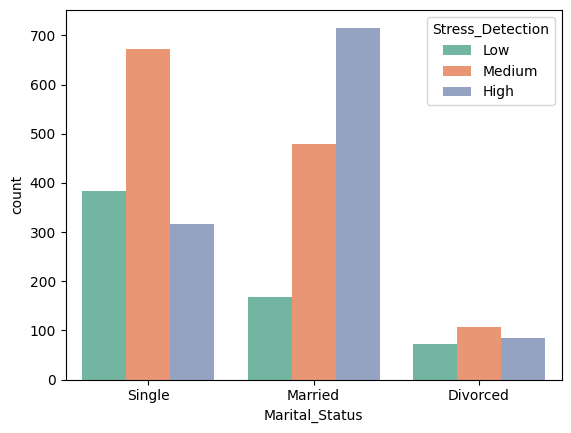

In [80]:
print(df['Marital_Status'].value_counts())
sns.countplot(data=df,x=df['Marital_Status'],hue=df['Stress_Detection'],palette = 'Set2')
plt.show()

Caffeine_Intake
2    1156
1    1074
3     667
0      94
4       9
Name: count, dtype: int64


<Axes: xlabel='Caffeine_Intake', ylabel='count'>

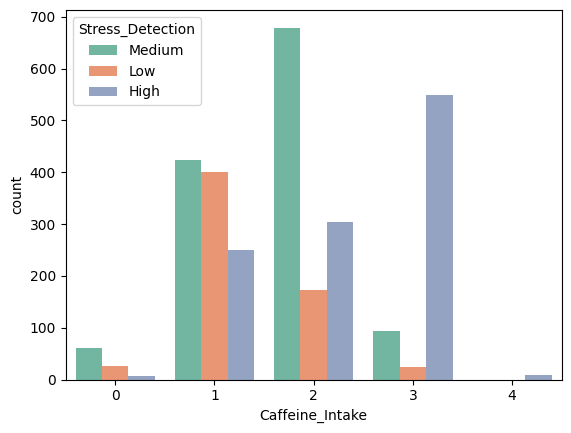

In [81]:
print(df['Caffeine_Intake'].value_counts())
sns.countplot(data=df,x=df['Caffeine_Intake'],hue=df['Stress_Detection'],palette = 'Set2')

Alcohol_Intake
1    1634
0     870
2     496
Name: count, dtype: int64


<Axes: xlabel='Alcohol_Intake', ylabel='count'>

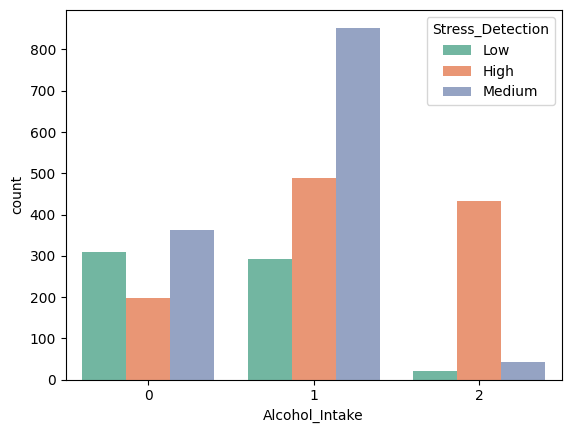

In [82]:
print(df['Alcohol_Intake'].value_counts())
sns.countplot(data=df,x=df['Alcohol_Intake'],hue=df['Stress_Detection'],palette = 'Set2')

Smoking_Habit
Yes    1601
No     1399
Name: count, dtype: int64


<Axes: xlabel='Smoking_Habit', ylabel='count'>

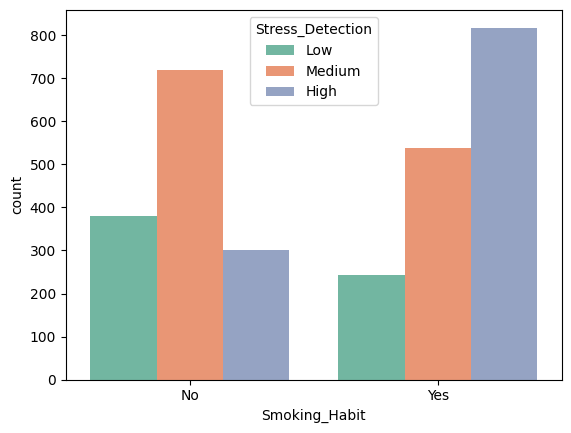

In [83]:
print(df['Smoking_Habit'].value_counts())
sns.countplot(data=df,x=df['Smoking_Habit'],hue=df['Stress_Detection'],palette = 'Set2')

Meditation_Practice
Yes    1837
No     1163
Name: count, dtype: int64


<Axes: xlabel='Meditation_Practice', ylabel='count'>

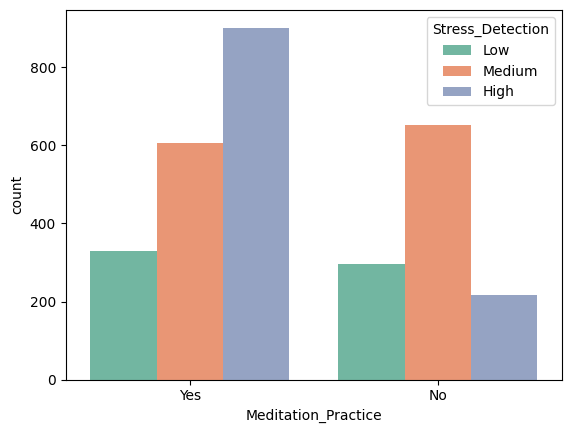

In [84]:
print(df['Meditation_Practice'].value_counts())
sns.countplot(data=df,x=df['Meditation_Practice'],hue=df['Stress_Detection'],palette = 'Set2')

Exercise_Type
Strength Training    979
Cardio               812
Yoga                 712
Pilates              357
Meditation           108
Aerobics              17
Walking               15
Name: count, dtype: int64


<Axes: xlabel='Exercise_Type', ylabel='count'>

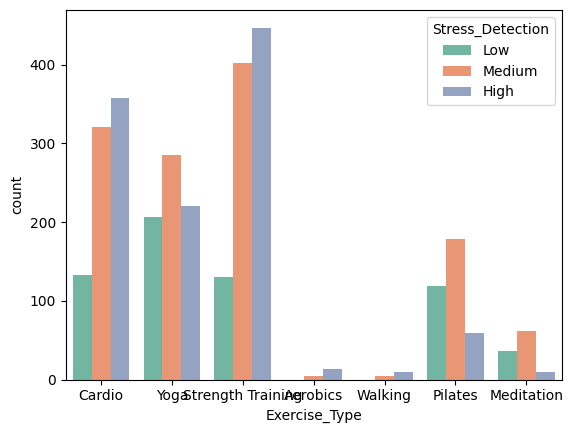

In [85]:
print(df['Exercise_Type'].value_counts())
sns.countplot(data=df,x=df['Exercise_Type'],hue=df['Stress_Detection'],palette = 'Set2')

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Feature Engineering</span> </center>


In [86]:
print("----------------------------------")
print(df['Wake_Up_Time'].value_counts())
print("----------------------------------")
print(df['Bed_Time'].value_counts())
print("----------------------------------")

----------------------------------
Wake_Up_Time
7:00 AM    726
8:00 AM    487
6:00 AM    473
6:30 AM    465
7:30 AM    286
5:30 AM    260
9:00 AM    185
5:00 AM     76
8:30 AM     28
4:30 AM     14
Name: count, dtype: int64
----------------------------------
Bed_Time
6:00 PM     571
11:00 PM    482
10:30 PM    478
5:00 PM     382
10:00 PM    323
7:00 PM     133
11:30 PM    130
9:30 PM     120
12:30 AM     84
9:00 PM      82
12:00 AM     57
6:30 PM      52
5:30 PM      33
8:30 PM      18
7:30 PM      18
1:00 AM      18
8:00 PM      10
4:00 PM       5
4:30 PM       4
Name: count, dtype: int64
----------------------------------


In [87]:
wake_up_dt = pd.to_datetime(df['Wake_Up_Time'], format='%I:%M %p')
bed_time_dt = pd.to_datetime(df['Bed_Time'], format='%I:%M %p')

time_difference = wake_up_dt - bed_time_dt

overnight_mask = time_difference < pd.Timedelta(0)
time_difference[overnight_mask] += pd.Timedelta(days=1)

df['sleep_hours'] = time_difference.dt.total_seconds() / 3600

df.drop(columns=['Wake_Up_Time', 'Bed_Time'], inplace=True)

- Engineered a new feature `sleep_hours` based on `Wake_Up_Time` and `Bed_Time`

In [88]:
df[['Sleep_Duration', 'sleep_hours']].head()

,Sleep_Duration,sleep_hours
0,7.0,9.0
1,6.0,7.0
2,7.0,9.0
3,7.0,9.0
4,8.0,8.0


#### the difference between the two columns (`Sleep_Hours` and `Sleep_Duration`) comes from:

- **Sleep Latency:** The time it takes to actually fall asleep after getting into bed.
- **Waking Up During the Night:** Brief periods of being awake (e.g., to use the restroom) that don't count as sleep.
- **Time Before Getting Up:** Waking up but staying in bed for a while before starting the day.

In [89]:
df['sleep_efficiency'] = (df['Sleep_Duration'] / df['sleep_hours']) * 10 # multiplied by 10 to keep the scale of sleep_efficiency and Sleep_Quality same

# In case of any data entry errors where duration > time in bed, cap efficiency at 100%
df.loc[df['sleep_efficiency'] > 100, 'sleep_efficiency'] = 100

- Engineered a new feature `sleep_efficiency` based on `sleep_hours` and `Sleep_Duration`

In [90]:
df[['sleep_efficiency', 'Sleep_Quality']].head()

,sleep_efficiency,Sleep_Quality
0,7.777778,4.0
1,8.571429,3.0
2,7.777778,4.0
3,7.777778,4.0
4,10.000000,5.0


### Feature Engineering: Sleep Efficiency Score

To deepen our understanding of sleep patterns, we are engineering a new feature called **`Sleep Efficiency`**. This is a powerful metric used in sleep science to objectively measure sleep quality.

#### What is Sleep Efficiency?

Sleep Efficiency represents the percentage of time a person spends asleep while they are in bed. It is calculated using the following formula:

$$\text{Sleep Efficiency} = \frac{\text{Sleep Duration}}{\text{Total Time in Bed (sleep\_hours)}} \times 100$$

A higher efficiency score indicates better, more consolidated sleep, while a lower score can suggest restlessness, insomnia, or other sleep disturbances—all of which are highly relevant to stress.



#### Sleep Efficiency vs. Sleep Quality

In our dataset, we now have two powerful but distinct metrics for sleep quality:

* **`Sleep Efficiency` (Objective):** This is a calculated, data-driven metric. It tells us the factual percentage of time spent asleep from the total time a person was in bed. It's a measure of *what actually happened*.
* **`Sleep_Quality` (Subjective):** This is a self-reported rating. It tells us how a person *felt* about their sleep. It's a measure of *perception*.

We expect these two features to be correlated, and our analysis confirms this. However, a correlation of less than 1.0 proves they each contribute unique information. A person can have high efficiency but feel their sleep was poor (unrefreshing sleep), or vice-versa.

By keeping both, we allow our model to capture a more complete picture of a person's well-being, combining the physical reality with the psychological perception to better predict stress levels.

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Handling `Occupation` feature - Reducing Dimensionality </span> </center>


In [91]:
# Define the mapping from generic category to a list of specific occupations
occupation_groups = {
    'Technology & IT': [
        'Software Engineer', 'Data Scientist', 'Software Developer', 'IT Manager',
        'Web Developer', 'Network Engineer', 'IT Consultant', 'SEO Specialist',
        'IT Specialist', 'Product Designer', 'Digital Marketer', 'Network Administrator',
        'Database Administrator', 'Software Architect', 'UX Designer', 'Data Engineer',
        'Software Tester', 'IT Support Specialist', 'Developer', 'IT Support', 'Technician',
        'Program Manager'
    ],
    'Healthcare & Medical': [
        'Doctor', 'Nurse', 'Physician', 'Nutritionist', 'Psychologist', 'Pharmacist',
        'Veterinarian', 'Physiotherapist', 'Dentist', 'Surgeon', 'Therapist',
        'Healthcare Assistant', 'Nurse Practitioner', 'Medical Assistant', 'Nutritional Specialist'
    ],
    'Business, Finance & Management': [
        'Marketing Manager', 'Business Owner', 'Business Consultant', 'Project Manager',
        'HR Specialist', 'Business Analyst', 'Product Manager', 'Operations Manager',
        'Accountant', 'HR Manager', 'Financial Analyst', 'Sales Manager', 'Manager',
        'Financial Advisor', 'Entrepreneur', 'Project Coordinator', 'Advertising Manager',
        'Brand Manager', 'Bank Manager', 'Account Manager', 'CEO', 'HR Executive',
        'Executive Director', 'Human Resources', 'Human Resources Manager', 'Marketing Director',
        'Financial Planner'
    ],
    'Creative, Arts & Media': [
        'Graphic Designer', 'Content Writer', 'Journalist', 'Interior Designer', 'Photographer',
        'Musician', 'Artist', 'Writer', 'Fashion Designer', 'Content Creator',
        'Copywriter', 'Content Strategist', 'Advertising Executive', 'Editor', 'Designer'
    ],
    'Sales & Customer Service': [
        'Sales Executive', 'Marketing Specialist', 'Sales Representative', 'Retail Manager',
        'Insurance Agent', 'Marketing Executive', 'Salesperson', 'Customer Support',
        'Retail Worker'
    ],
    'Skilled Trades & Labor': [
        'Civil Engineer', 'Construction Worker', 'Electrician', 'Plumber',
        'Construction Manager', 'Mechanical Engineer', 'Construction Engineer',
        'Electrical Engineer', 'Electrical Technician', 'Shopkeeper', 'Farmer', 'Tailor',
        'Carpenter', 'Weaver', 'Blacksmith', 'Fisherwoman', 'Potter', 'Seamstress',
        'Bakery Owner', 'Vegetable Vendor', 'Flower Seller', 'Mechanic', 'Handicrafts Maker',
        'Cobbler', 'Street Vendor', 'Factory Worker', 'Janitor', 'Painter', 'Cleaner',
        'Baker', 'Warehouse Worker'
    ],
    'Education & Research': [
        'Teacher', 'Research Assistant', 'Research Scientist', 'Scientist', 'Librarian',
        'Primary School Teacher', 'Researcher', 'Research Analyst', 'Physicist', 'Biologist',
        'Laboratory Technician'
    ],
    'Legal & Public Service': [
        'Lawyer', 'Civil Servant', 'Police Officer', 'Firefighter', 'Security Guard',
        'Social Worker', 'Security Officer'
    ],
    'Hospitality & Events': [
        'Chef', 'Event Planner', 'Bartender', 'Restaurant Manager', 'Waitress',
        'Event Manager', 'Event Coordinator'
    ],
    'Transportation & Logistics': [
        'Truck Driver', 'Driver', 'Taxi Driver', 'Pilot', 'Bus Driver', 'Delivery Driver',
        'Courier'
    ],
    'Personal Care & Fitness': [
        'Fitness Trainer', 'Hair Stylist', 'Personal Trainer', 'Nanny', 'Receptionist',
        'Fitness Instructor'
    ],
    'General/Other': [
        'Retired', 'Freelancer', 'Student', 'Actor', 'Banker', 'Secretary', 'Real Estate Agent'
    ]
}

In [92]:
occupation_to_group_map = {
    occupation: group for group, occupations in occupation_groups.items() for occupation in occupations
}

df['Occupation_Group'] = df['Occupation'].map(occupation_to_group_map)

# Fill any occupations that weren't in our list with 'Other'
df['Occupation_Group'].fillna('General/Other', inplace=True)

df = df.drop(columns=['Occupation'])

In [93]:
df['Occupation_Group'].head()

0                   Technology & IT
1    Business, Finance & Management
2                   Technology & IT
3                   Technology & IT
4              Education & Research
Name: Occupation_Group, dtype: object

- Reduced 169 categories of `Occupation` feature into 12 generic categories

In [94]:
group_counts = df['Occupation_Group'].value_counts().reset_index()
group_counts.columns = ['Occupation_Group', 'Count']

fig_bubble = px.scatter(
    group_counts,
    x='Occupation_Group',
    y='Count',
    size='Count',
    color='Occupation_Group',
    hover_name='Occupation_Group',
    size_max=70,
    title='Relative Size of Occupation Groups'
)

fig_bubble.update_layout(
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    plot_bgcolor='white',
    showlegend=True
)

# Mostrar la gráfica directamente
fig_bubble.show()

### 🎯 Dimensionality Reduction: Grouping the 'Occupation' Feature

In our dataset, the `Occupation` column is a **high-cardinality** feature, meaning it contains a large number of unique categories—169, to be exact.

#### The Challenge: The Curse of Dimensionality

If we were to directly apply **One-Hot Encoding (OHE)** to this feature, it would create 169 new binary columns in our dataset. This presents two major problems:

1.  **Increased Complexity:** The sheer number of new features would make our model significantly more complex and slower to train.
2.  **Risk of Overfitting:** Many of these occupations have very few data points, which can lead the model to learn from noise rather than true patterns, harming its ability to generalize to new data.

#### Our Solution: Strategic Grouping 💡

To address this, we've strategically grouped the 169 specific occupations into **12 broader, more meaningful categories** (e.g., 'Technology & IT', 'Healthcare & Medical', 'Skilled Trades & Labor', etc.).

The primary benefit of this approach is that it makes One-Hot Encoding feasible. Instead of creating 169 new features, we now only create 12. This dramatically reduces the dimensionality of our dataset, leading to a more efficient and robust model.

#### A Note on Class Imbalance ⚖️

We recognize that class imbalance exists in other features within this dataset, and we are proceeding with awareness of this.

While this grouping strategy *also* helps mitigate the imbalance within the `Occupation` feature by combining rare job titles into larger groups, our main motivation here was to solve the critical issue of **dimensionality**. This was a targeted decision to make a key feature manageable for our modeling process, directly improving our chances of building a generalizable and performant model.

In [95]:
cols_to_cap = [
    'Physical_Activity', 'Screen_Time', 'Travel_Time', 'Social_Interactions' # this features have few negative values which doesnt seem real so we are capping it to 0
]

for col in cols_to_cap:
    df.loc[df[col] < 0, col] = 0

print("Negative values in specified columns have been capped at 0.")

Negative values in specified columns have been capped at 0.


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Numerical Features EDA </span> </center>


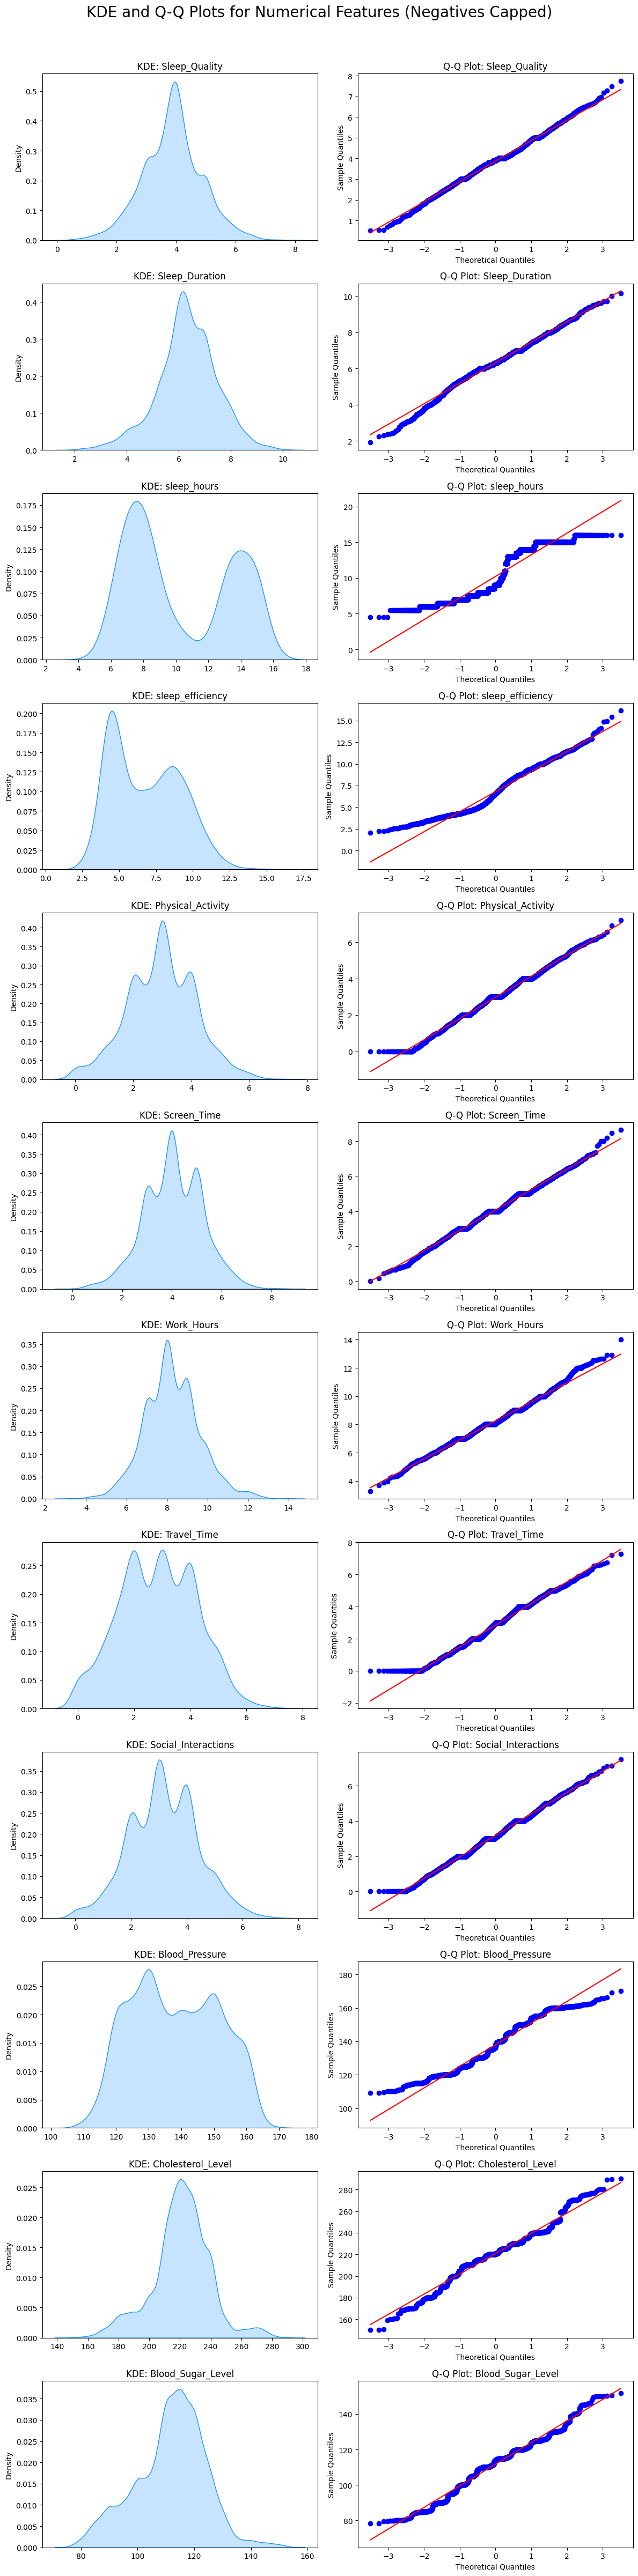

In [96]:
numerical_features = [
    'Sleep_Quality', 'Sleep_Duration', 'sleep_hours', 'sleep_efficiency',
    'Physical_Activity', 'Screen_Time', 'Work_Hours', 'Travel_Time',
    'Social_Interactions', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level'
]

# Create a figure and a set of subplots
fig, axes = plt.subplots(
    nrows=len(numerical_features),
    ncols=2,
    figsize=(12, 4 * len(numerical_features))
)

fig.suptitle('KDE and Q-Q Plots for Numerical Features (Negatives Capped)', fontsize=20, y=1.0)

for i, col in enumerate(numerical_features):
    # --- KDE Plot (Left) ---
    ax_kde = axes[i, 0]
    sns.kdeplot(data=df, x=col, fill=True, ax=ax_kde, color='dodgerblue')
    ax_kde.set_title(f'KDE: {col}', fontsize=12)
    ax_kde.set_xlabel('')
    ax_kde.set_ylabel('Density')

    # --- Q-Q Plot (Right) ---
    ax_qq = axes[i, 1]
    stats.probplot(df[col].dropna(), dist="norm", plot=ax_qq)
    ax_qq.set_title(f'Q-Q Plot: {col}', fontsize=12)
    ax_qq.set_xlabel('Theoretical Quantiles')
    ax_qq.set_ylabel('Sample Quantiles')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.99]) # rect leaves space for suptitle
plt.show()

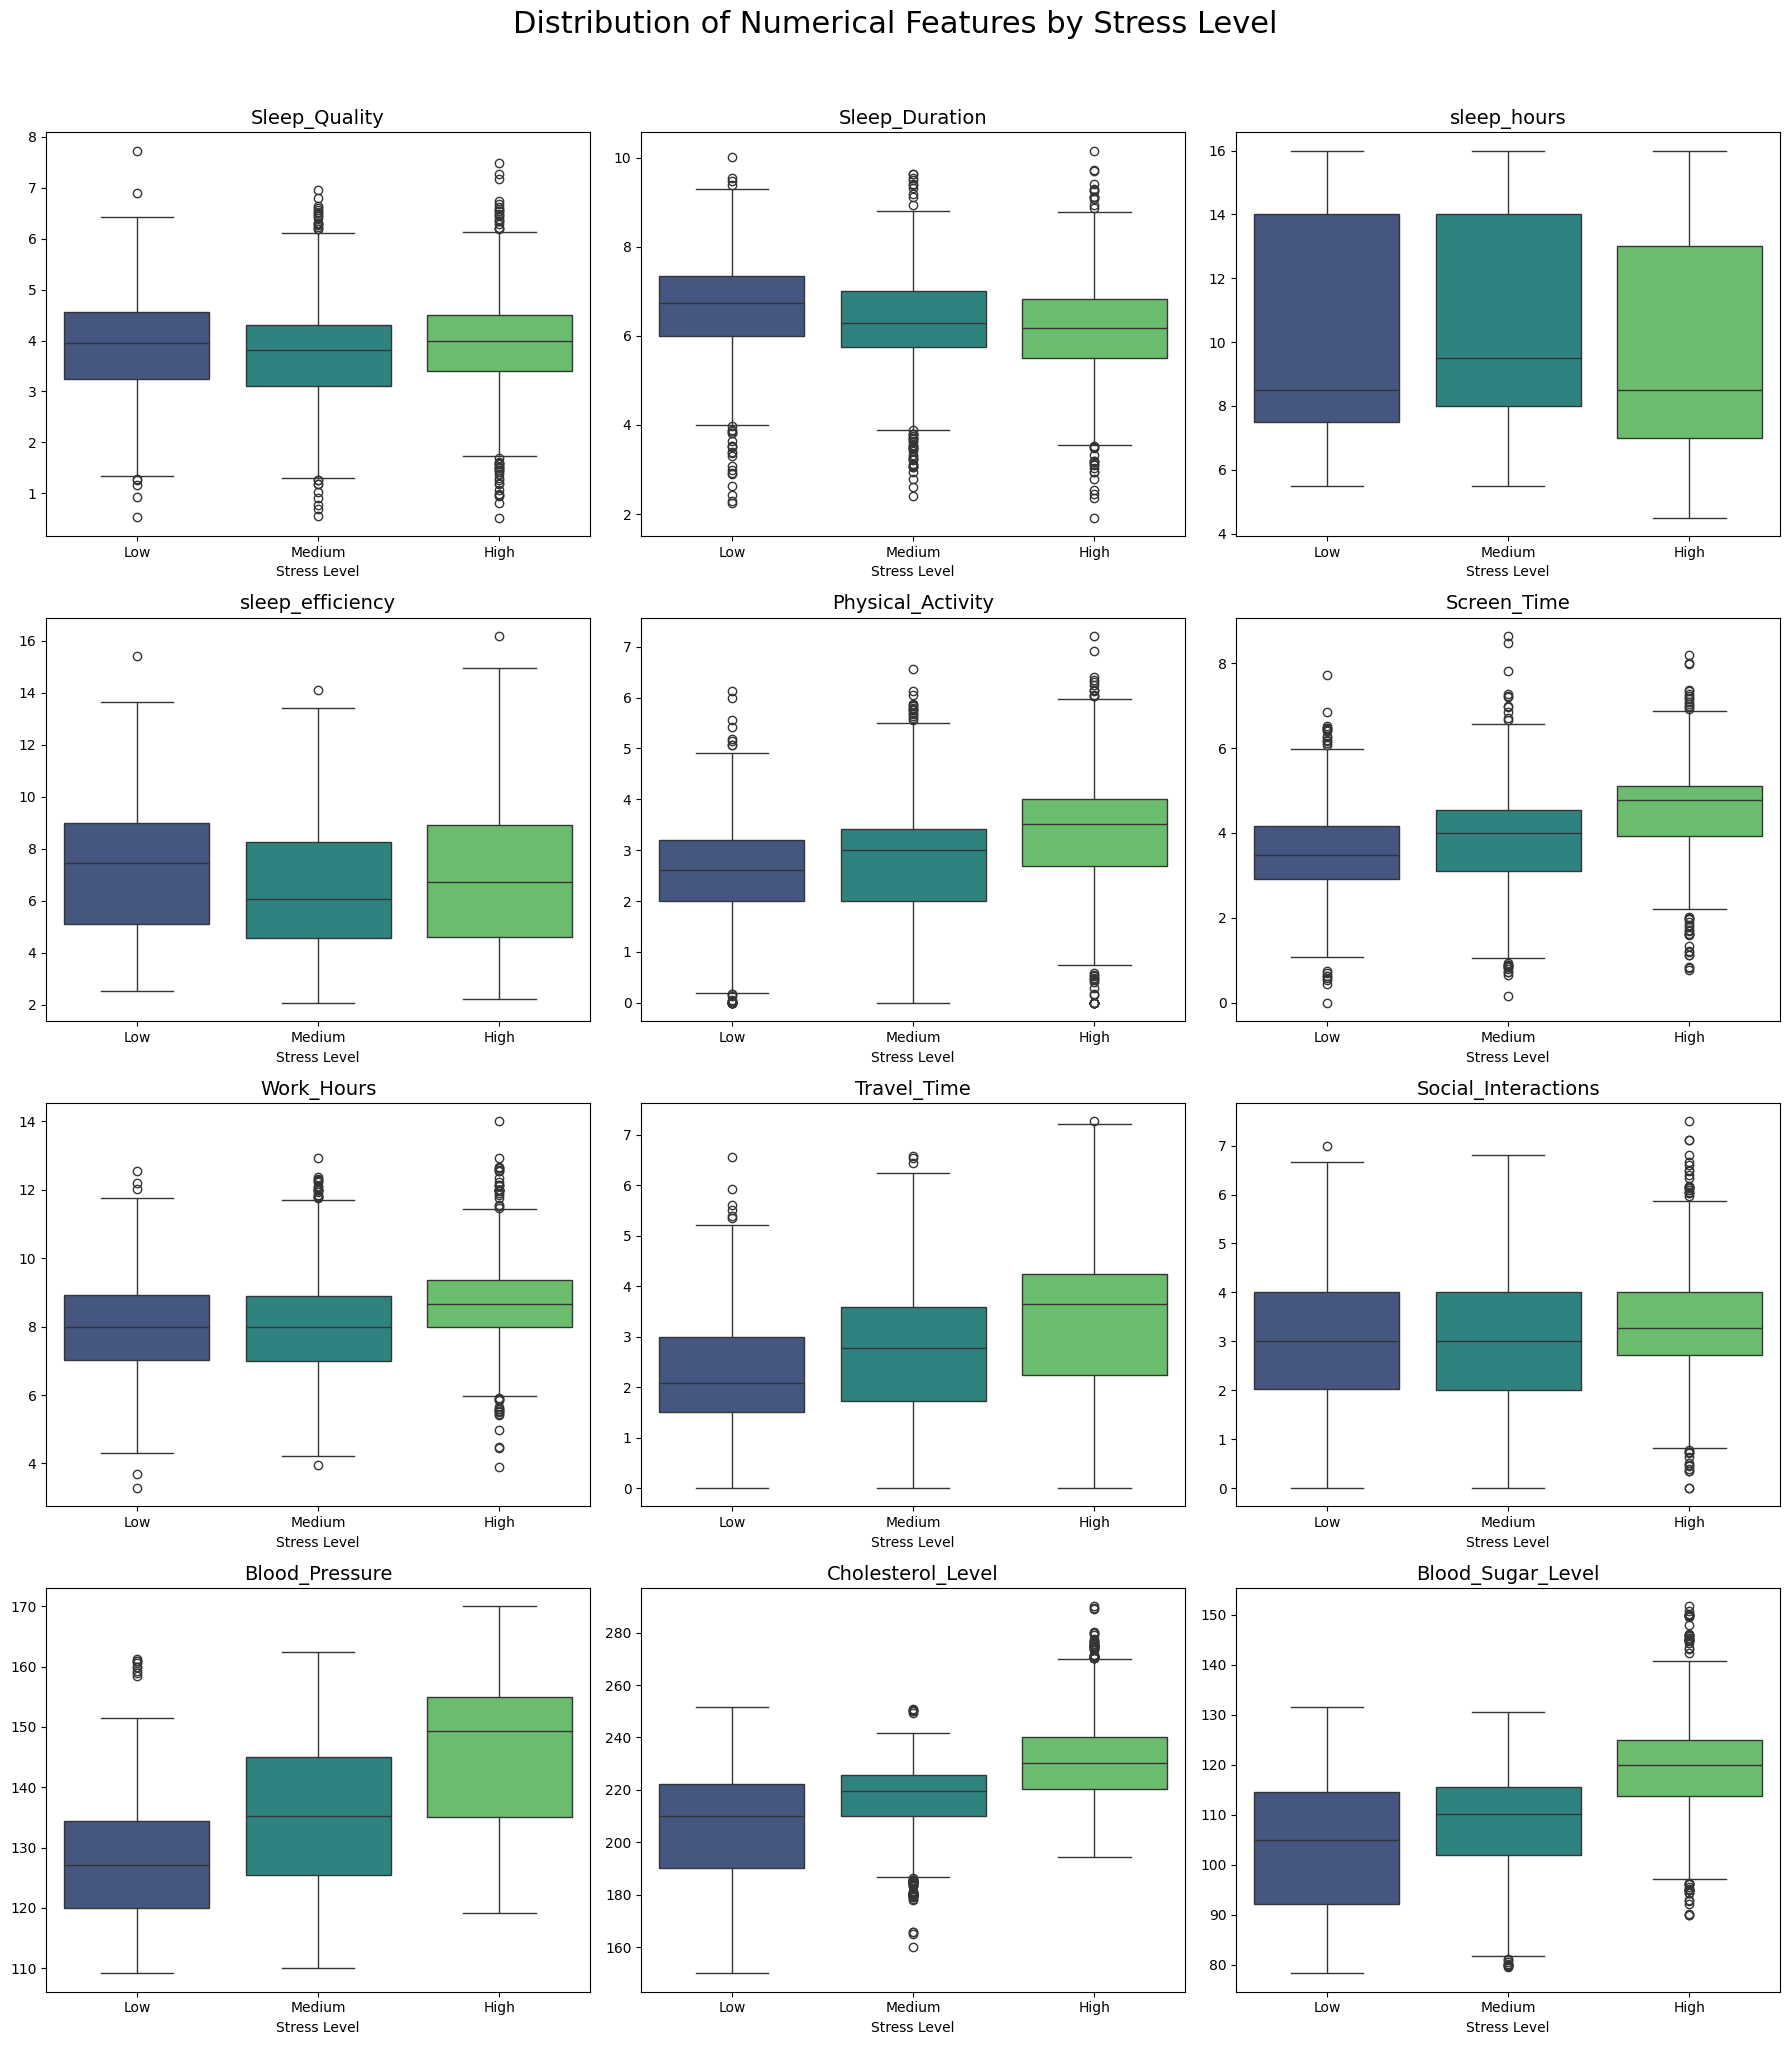

In [97]:
stress_order = ['Low', 'Medium', 'High']

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

fig.suptitle('Distribution of Numerical Features by Stress Level', fontsize=22, y=1.02)

for i, feature in enumerate(numerical_features):
    # Calculate the row and column index for the subplot
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.boxplot(
        data=df,
        x='Stress_Detection',
        y=feature,
        ax=ax,
        order=stress_order,
        palette='viridis'
    )

    ax.set_title(f'{feature}', fontsize=14)
    ax.set_xlabel('Stress Level', fontsize=10)
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Encoding Features </span> </center>


In [98]:
boolean_map = {'No': 0, 'Yes': 1}
columns_to_encode = ['Smoking_Habit', 'Meditation_Practice']
for col in columns_to_encode:
    df[col] = df[col].map(boolean_map)
print(df[['Smoking_Habit', 'Meditation_Practice']].head())

   Smoking_Habit  Meditation_Practice
0              0                    1
1              0                    0
2              0                    1
3              0                    1
4              0                    1


In [99]:
target_mapping = {'Low': 0, 'Medium': 1,'High':2}
df['Stress_Detection'] = df['Stress_Detection'].map(target_mapping)
print(df['Stress_Detection'].head())

0    0
1    1
2    2
3    0
4    0
Name: Stress_Detection, dtype: int64


In [100]:
gender_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
print(df['Gender'].head())

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64


In [101]:
marital_encoding = {'Single': 0, 'Divorced': 1,'Married':2}
df['Marital_Status'] = df['Marital_Status'].map(marital_encoding)
print(df['Marital_Status'].head())

0    0
1    2
2    1
3    0
4    0
Name: Marital_Status, dtype: int64


In [102]:
from sklearn.preprocessing import LabelEncoder

exercise_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()

df['Exercise_Type'] = exercise_encoder.fit_transform(df['Exercise_Type'])
df['Occupation_Group'] = occupation_encoder.fit_transform(df['Occupation_Group'])

# Print label mappings for Exercise_Type
print("Exercise_Type label mapping:")
for label, code in zip(exercise_encoder.classes_, range(len(exercise_encoder.classes_))):
    print(f"{label} → {code}")

# Print label mappings for Occupation_Group
print("\nOccupation_Group label mapping:")
for label, code in zip(occupation_encoder.classes_, range(len(occupation_encoder.classes_))):
    print(f"{label} → {code}")

Exercise_Type label mapping:
Aerobics → 0
Cardio → 1
Meditation → 2
Pilates → 3
Strength Training → 4
Walking → 5
Yoga → 6

Occupation_Group label mapping:
Business, Finance & Management → 0
Creative, Arts & Media → 1
Education & Research → 2
General/Other → 3
Healthcare & Medical → 4
Hospitality & Events → 5
Legal & Public Service → 6
Personal Care & Fitness → 7
Sales & Customer Service → 8
Skilled Trades & Labor → 9
Technology & IT → 10
Transportation & Logistics → 11


In [103]:
df.head()

,Age,Gender,Marital_Status,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Smoking_Habit,...,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection,sleep_hours,sleep_efficiency,Occupation_Group
0,30.0,1,0,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,1,120.0,180.0,90.0,0,9.0,7.777778,10
1,35.0,0,2,6.0,3.0,1.0,3.0,0,1,0,...,3.0,0,6,110.0,160.0,80.0,1,7.0,8.571429,0
2,40.0,1,1,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,4,130.0,200.0,100.0,2,9.0,7.777778,10
3,35.0,1,0,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,1,120.0,180.0,90.0,0,9.0,7.777778,10
4,29.0,0,0,8.0,5.0,3.0,2.0,1,0,0,...,4.0,1,6,110.0,180.0,90.0,0,8.0,10.000000,2


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Correlation Matrix & Analysis</span> </center>


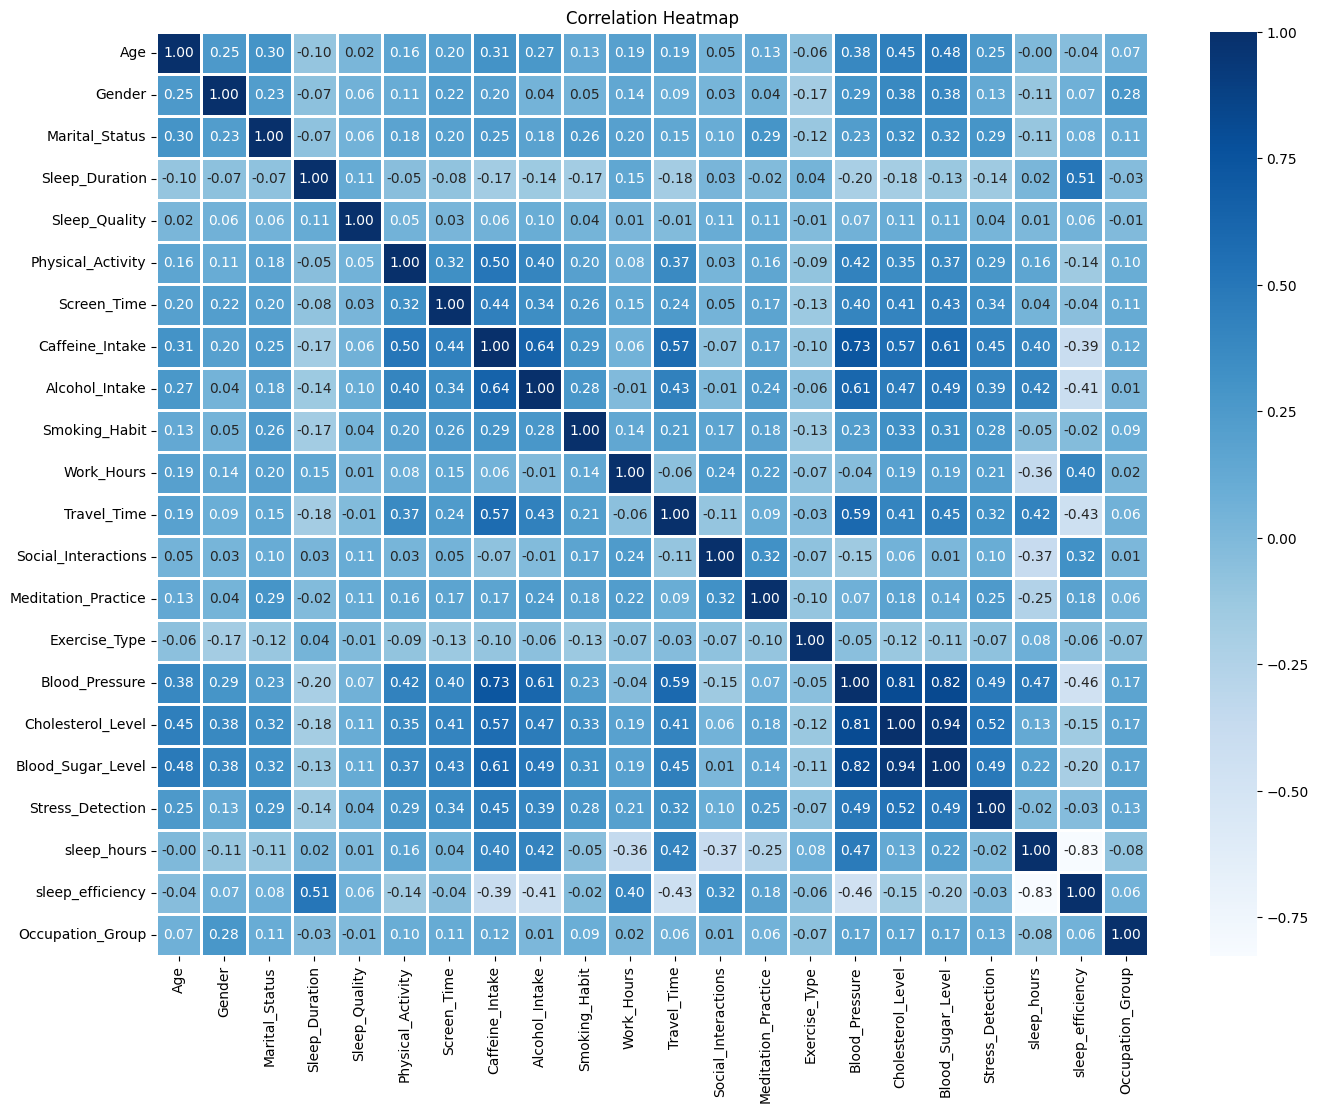

In [104]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Train-Test Split</span> </center>


In [105]:
X = df.drop(columns=['Stress_Detection'])
y = df['Stress_Detection']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Modeling - RandomForestClassifier + GridSearchCV</span> </center>


In [107]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None,5,10,20],
    'min_samples_split': [None,1,2,3,5],
    'min_samples_leaf': [None,1,2,3,5],
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score: 0.8845833333333333


In [108]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       117
           1       0.86      0.94      0.90       262
           2       0.92      0.93      0.93       221

    accuracy                           0.89       600
   macro avg       0.90      0.86      0.87       600
weighted avg       0.89      0.89      0.89       600



# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Confusion Matrix and Analysis</span> </center>


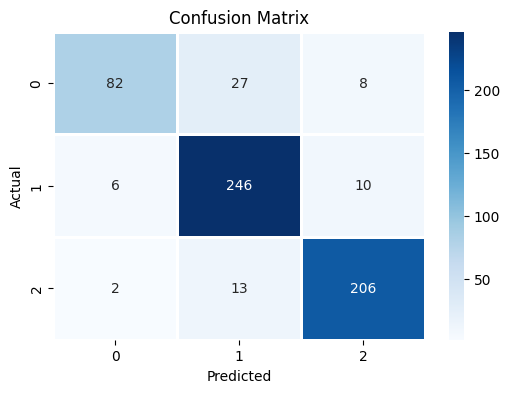

In [109]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Feature Importance</span> </center>


## <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">1. Using Random Forest inbuilt - feature_importances_</span>


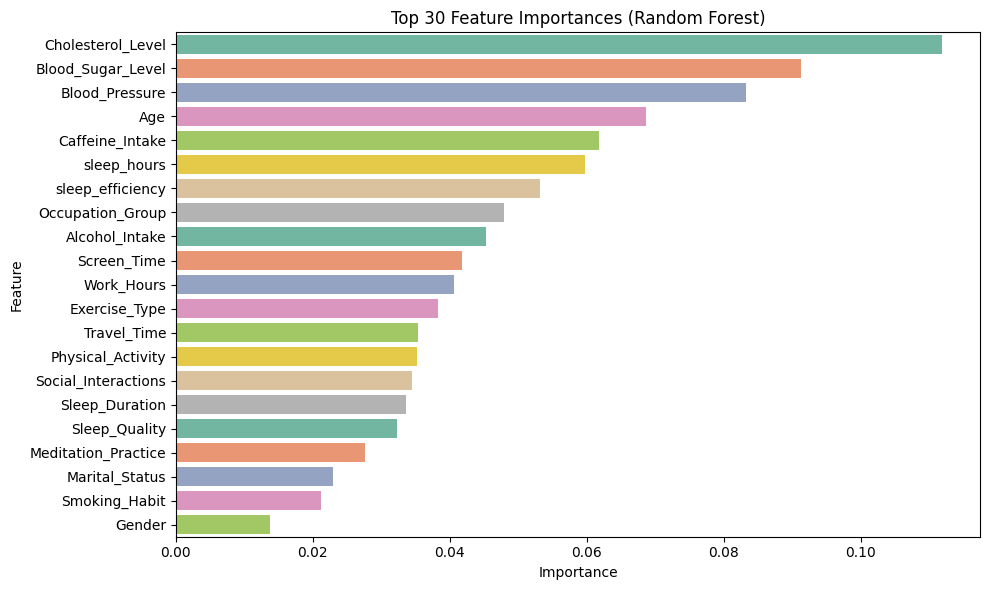

In [110]:
feature_names = X_train.columns

importances = grid_search.best_estimator_.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(30), x='Importance', y='Feature', palette='Set2')
plt.title('Top 30 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

## <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">2. Using SHAPley</span>


In [111]:
!pip install shap

100%|===================| 1792/1800 [00:51<00:00]        

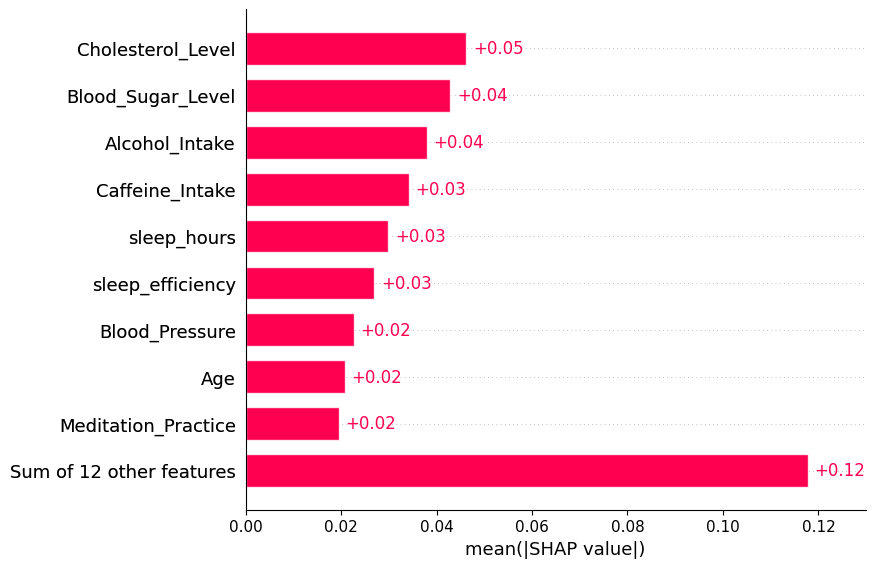

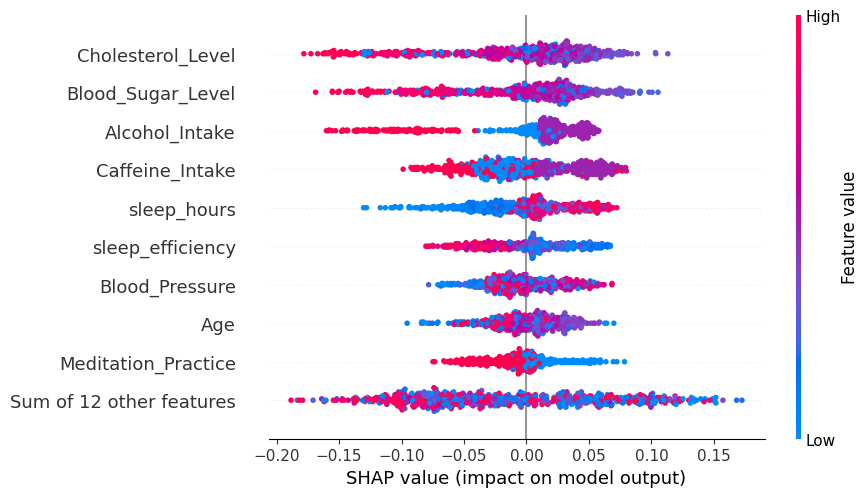

In [112]:
import shap

# API nueva: evita problemas de dimensionalidad
explainer = shap.Explainer(grid_search.best_estimator_, X_train)
shap_values = explainer(X_test)

# Para clasificación multiclase, selecciona clase "Medium" (índice 1)
shap.plots.bar(shap_values[:, :, 1])
shap.plots.beeswarm(shap_values[:, :, 1])

---
## Analysis: How Engineered Features Led to Success Despite Class Imbalance

Our final model demonstrated strong predictive performance, particularly in identifying "Medium" and "High" stress levels. This success is noteworthy because our target variable, `Stress_Detection`, was not perfectly balanced. The key to this achievement lies in the quality and power of our engineered features.



### 1. The Power of a Strong, Clear Signal 💡

The primary reason our model performed well is that our engineered features—specifically **`sleep_hours`** and **`sleep_efficiency`**—provided an exceptionally **strong and unambiguous signal**.

Class imbalance becomes a major problem when the model cannot find clear rules to distinguish between classes. However, as our SHAP analysis revealed, our features created very clear patterns:

* **Low `sleep_efficiency` consistently pointed towards High stress.**
* **High `sleep_hours` consistently pointed towards Low stress.**

Think of it like trying to find a specific landmark. If the landmark is a giant, brightly lit tower (a strong signal), you can find it easily even if the surrounding area is crowded and complex (the class imbalance). Our engineered features acted as that powerful signal, guiding the model directly to the correct conclusions, making the class imbalance less of an obstacle.

### 2. The Advantage of Our Random Forest Model 🌳

Our choice of a **Random Forest** model was also beneficial. Tree-based models work by finding the best feature splits that make the resulting groups as pure as possible.

Because features like `sleep_efficiency` provided such clean decision boundaries (e.g., a split at `efficiency < 75%` might effectively separate many "High" stress cases), the model could effectively isolate classes. Random Forest is inherently more robust to moderate class imbalance than some other algorithms, precisely because it can capitalize on these strong features to make decisive splits.

### 3. How Other Feature Engineering Helped ⚖️

It's also important to remember that our other major feature engineering step—**grouping the 169 `Occupation` categories into 12**—was a direct solution to an even more severe imbalance problem within that feature itself. By consolidating dozens of rare occupations with only a few data points into larger, more stable groups, we made the `Occupation_Group` feature much more reliable and prevented the model from learning noise. This added to the overall robustness of the model.

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Conclusion</span></center>


In summary, the model's success was not accidental. It was the direct result of a targeted feature engineering strategy. By transforming ambiguous, subjective features (`Sleep_Quality`, `Sleep_Duration`) into powerful, objective metrics (`sleep_efficiency`, `sleep_hours`), we provided the model with clear signals that were strong enough to overcome the moderate imbalance in our target variable. This, combined with a suitable model choice, allowed us to build a highly effective and interpretable stress detection system.

<div style="text-align:center; font-weight:bold; font-size: 20px; background: linear-gradient(135deg, #66bb6a, #26a69a); padding:15px; border-radius:10px; color:#ffffff;">
  🤖 My model can now predict <strong>stress levels</strong> with high accuracy.<br><br>
  The only thing it <span style="color:#ffcccb;">can’t predict</span> is...<br><br>
  Why people read <span style="font-style:italic;">whole analysis</span><br>
  just to skip the <strong>0.2-second upvote 👍</strong>.<br><br>
</div>


## Desarrollo Proyecto FEN

## Implementacion de PCA

In [113]:
df.head()

,Age,Gender,Marital_Status,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Smoking_Habit,...,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection,sleep_hours,sleep_efficiency,Occupation_Group
0,30.0,1,0,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,1,120.0,180.0,90.0,0,9.0,7.777778,10
1,35.0,0,2,6.0,3.0,1.0,3.0,0,1,0,...,3.0,0,6,110.0,160.0,80.0,1,7.0,8.571429,0
2,40.0,1,1,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,4,130.0,200.0,100.0,2,9.0,7.777778,10
3,35.0,1,0,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,1,120.0,180.0,90.0,0,9.0,7.777778,10
4,29.0,0,0,8.0,5.0,3.0,2.0,1,0,0,...,4.0,1,6,110.0,180.0,90.0,0,8.0,10.000000,2


In [114]:
df.columns

Index(['Age', 'Gender', 'Marital_Status', 'Sleep_Duration', 'Sleep_Quality',
       'Physical_Activity', 'Screen_Time', 'Caffeine_Intake', 'Alcohol_Intake',
       'Smoking_Habit', 'Work_Hours', 'Travel_Time', 'Social_Interactions',
       'Meditation_Practice', 'Exercise_Type', 'Blood_Pressure',
       'Cholesterol_Level', 'Blood_Sugar_Level', 'Stress_Detection',
       'sleep_hours', 'sleep_efficiency', 'Occupation_Group'],
      dtype='object')

In [115]:
# Importaciones adicionales para PCA y KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [116]:
# Preparacon de datos para PCA
print("Forma original del dataset:", df.shape)
print("Columnas del dataset:")
print(df.columns.tolist())

# Separar feacture
X_pca = df.drop(columns=['Stress_Detection'])
y_pca = df['Stress_Detection']

print(f"\nFeatures para PCA: {X_pca.shape[1]}")
print(f"Número de muestras: {X_pca.shape[0]}")
print(f"Distribución de clases de estrés: {y_pca.value_counts().to_dict()}")

Forma original del dataset: (3000, 22)
Columnas del dataset:
['Age', 'Gender', 'Marital_Status', 'Sleep_Duration', 'Sleep_Quality', 'Physical_Activity', 'Screen_Time', 'Caffeine_Intake', 'Alcohol_Intake', 'Smoking_Habit', 'Work_Hours', 'Travel_Time', 'Social_Interactions', 'Meditation_Practice', 'Exercise_Type', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Stress_Detection', 'sleep_hours', 'sleep_efficiency', 'Occupation_Group']

Features para PCA: 21
Número de muestras: 3000
Distribución de clases de estrés: {1: 1258, 2: 1118, 0: 624}


## Aplicación de PCA 
## Dado que PCA busca direcciones de maxima varianza si las variables tienen escalas diferentes, hay un mayor riesgos con las que tengan una escala mayor.

In [117]:
# Estandarizacion de los datos StandardScaler transforma las variables para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

print("Datos estandarizados:")
print(f"Media: {np.mean(X_scaled, axis=0)[:5]}")  # mostrar 5
print(f"Desviación estándar: {np.std(X_scaled, axis=0)[:5]}")  # mostrar solo las primeras 5

# Aplicar PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Análisis de varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nVarianza explicada por cada componente (primeros 10):")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.3f} ({explained_variance_ratio[i]*100:.1f}%)")

print(f"\nVarianza acumulada:")
print(f"PC1-PC2: {cumulative_variance_ratio[1]:.3f} ({cumulative_variance_ratio[1]*100:.1f}%)")
print(f"PC1-PC5: {cumulative_variance_ratio[4]:.3f} ({cumulative_variance_ratio[4]*100:.1f}%)")
print(f"PC1-PC10: {cumulative_variance_ratio[9]:.3f} ({cumulative_variance_ratio[9]*100:.1f}%)")

Datos estandarizados:
Media: [-1.69938138e-16 -1.18423789e-17  8.05281767e-17  7.31859018e-16
  8.59756710e-16]
Desviación estándar: [1. 1. 1. 1. 1.]

Varianza explicada por cada componente (primeros 10):
PC1: 0.271 (27.1%)
PC2: 0.140 (14.0%)
PC3: 0.066 (6.6%)
PC4: 0.060 (6.0%)
PC5: 0.050 (5.0%)
PC6: 0.048 (4.8%)
PC7: 0.044 (4.4%)
PC8: 0.040 (4.0%)
PC9: 0.038 (3.8%)
PC10: 0.035 (3.5%)

Varianza acumulada:
PC1-PC2: 0.412 (41.2%)
PC1-PC5: 0.587 (58.7%)
PC1-PC10: 0.792 (79.2%)


In [118]:
#  graficas de varianza explicada
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Varianza Explicada por Componente', 'Varianza Acumulada'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}]]
)

# varianza explicada por componente
fig.add_trace(
    go.Bar(
        x=[f'PC{i+1}' for i in range(len(explained_variance_ratio))],
        y=explained_variance_ratio,
        name='Varianza Explicada',
        marker_color='lightblue'
    ),
    row=1, col=1
)

# varianza acumulada
fig.add_trace(
    go.Scatter(
        x=[f'PC{i+1}' for i in range(len(cumulative_variance_ratio))],
        y=cumulative_variance_ratio,
        mode='lines+markers',
        name='Varianza Acumulada',
        line=dict(color='orange', width=3),
        marker=dict(size=8)
    ),
    row=1, col=2
)

# línea horizontal en 95%
fig.add_hline(y=0.95, line_dash="dash", line_color="red", row=1, col=2)

fig.update_layout(
    height=500,
    title_text="Análisis de Varianza Explicada - PCA",
    showlegend=True
)

fig.update_xaxes(title_text="Componentes Principales", row=1, col=1)
fig.update_xaxes(title_text="Componentes Principales", row=1, col=2)
fig.update_yaxes(title_text="Varianza Explicada", row=1, col=1)
fig.update_yaxes(title_text="Varianza Acumulada", row=1, col=2)

fig.show()

# Determinar cuantos compoentes necesitamos para 95% de varianza
components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nComponentes necesarios para 95% de varianza: {components_95}")
print(f"Reducción de dimensionalidad: {X_pca.shape[1]} → {components_95} ({((X_pca.shape[1] - components_95) / X_pca.shape[1] * 100):.1f}% reducción)")


Componentes necesarios para 95% de varianza: 16
Reducción de dimensionalidad: 21 → 16 (23.8% reducción)


In [119]:
# Aplicar PCA con el número de componentes para 95% de varianza
pca_reduced = PCA(n_components=components_95)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)

print(f"Datos transformados con PCA:")
print(f"Forma original: {X_scaled.shape}")
print(f"Forma reducida: {X_pca_reduced.shape}")
print(f"Varianza total preservada: {np.sum(pca_reduced.explained_variance_ratio_):.3f} ({np.sum(pca_reduced.explained_variance_ratio_)*100:.1f}%)")

# Crear DataFrame con componentes principales
pca_df = pd.DataFrame(
    X_pca_reduced, 
    columns=[f'PC{i+1}' for i in range(components_95)]
)
pca_df['Stress_Level'] = y_pca.values

# Mostrar estadísticas de los primeros componentes
print(f"\nEstadísticas de los primeros 5 componentes principales:")
print(pca_df.iloc[:, :5].describe())

Datos transformados con PCA:
Forma original: (3000, 21)
Forma reducida: (3000, 16)
Varianza total preservada: 0.960 (96.0%)

Estadísticas de los primeros 5 componentes principales:
                PC1           PC2           PC3           PC4           PC5
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03
mean  -2.605323e-17 -4.855375e-17 -1.125026e-17 -2.368476e-17 -1.302662e-17
std    2.387809e+00  1.716714e+00  1.178912e+00  1.119158e+00  1.024503e+00
min   -5.530748e+00 -4.251444e+00 -3.520061e+00 -4.150798e+00 -3.188126e+00
25%   -1.865012e+00 -1.371226e+00 -8.461314e-01 -6.518554e-01 -6.974636e-01
50%   -1.425181e-01  3.608300e-02 -3.370694e-02  4.569400e-02  1.919929e-02
75%    1.932485e+00  1.401667e+00  8.295437e-01  7.282061e-01  6.835804e-01
max    5.000462e+00  4.402792e+00  3.681542e+00  3.446159e+00  4.015390e+00


### Interpretación de Componentes Principales: ¿Que representan PC1, PC2, PC3...?

Los componentes principales son **combinaciones lineales** de las variables originales. Para entender qué representan, necesitamos analizar los **loadings** (pesos) que cada variable original tiene en cada componente.

LOADINGS (Pesos) de cada variable en los componentes principales:
 PC1 (Explica 27.1% de varianza):
--------------------------------------------------
Variables que MaS contribuyen:
 1. Blood_Pressure      : +0.379 (Positiva)
 2. Blood_Sugar_Level   : +0.361 (Positiva)
 3. Cholesterol_Level   : +0.350 (Positiva)
 4. Caffeine_Intake     : +0.349 (Positiva)
 5. Alcohol_Intake      : +0.301 (Positiva)
 6. Travel_Time         : +0.276 (Positiva)
 7. Physical_Activity   : +0.232 (Positiva)
 8. Screen_Time         : +0.225 (Positiva)
 PC2 (Explica 14.0% de varianza):
--------------------------------------------------
Variables que MaS contribuyen:
 1. sleep_efficiency    : +0.454 (Positiva)
 2. sleep_hours         : -0.451 (Negativa)
 3. Work_Hours          : +0.367 (Positiva)
 4. Social_Interactions : +0.323 (Positiva)
 5. Meditation_Practice : +0.281 (Positiva)
 6. Marital_Status      : +0.237 (Positiva)
 7. Gender              : +0.191 (Positiva)
 8. Age                 : +0.152 (Positiva

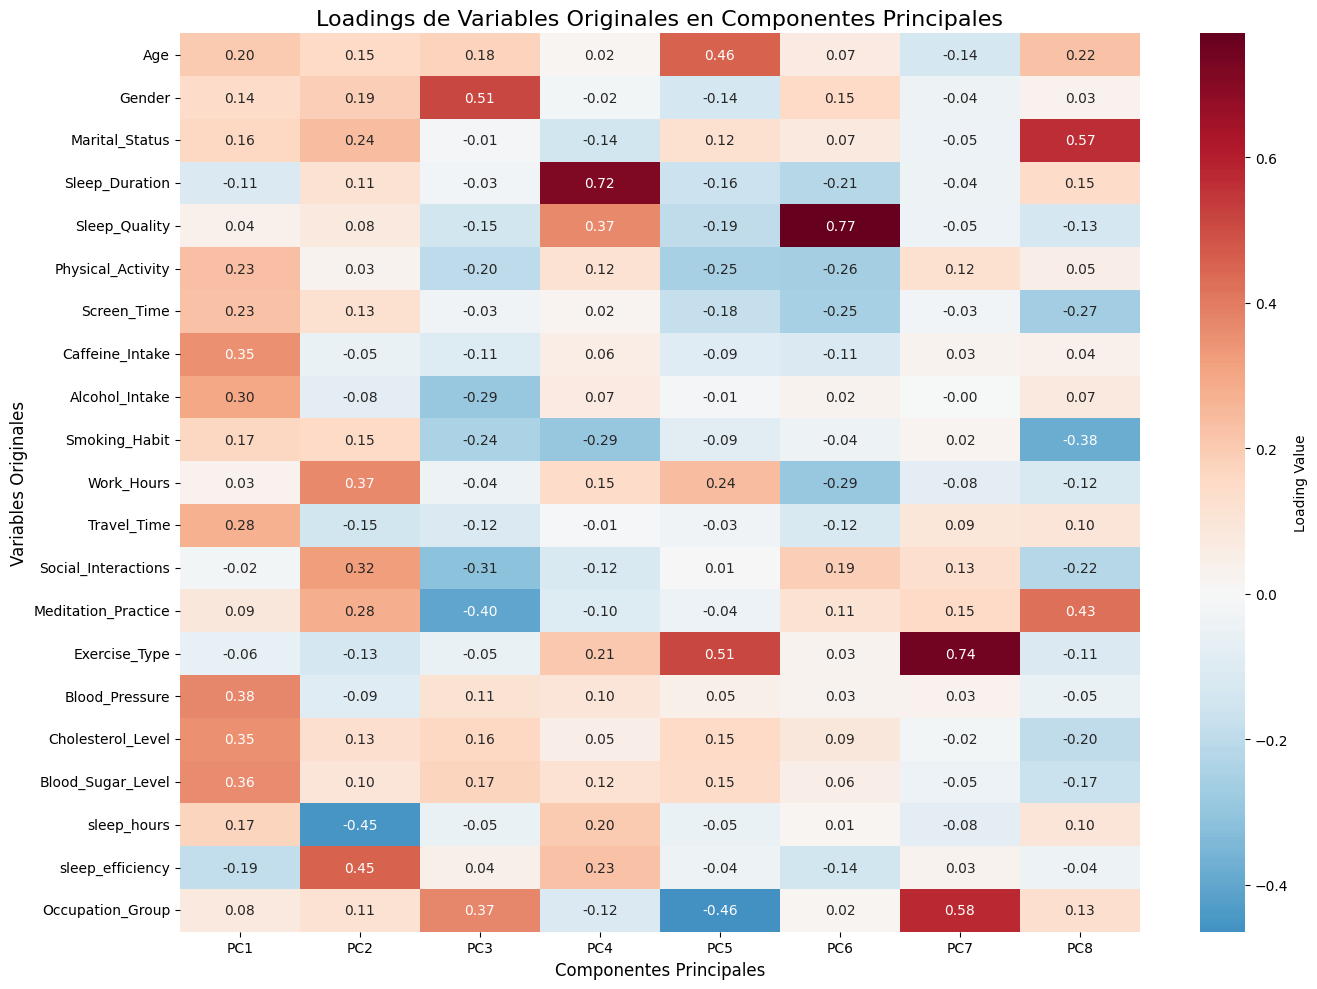

INTERPRETACION:
- Valores POSITIVOS: La variable aumenta cuando el componente aumenta
- Valores NEGATIVOS: La variable disminuye cuando el componente aumenta
- Valores cercanos a 0: La variable contribuye poco a ese componente
- Valores altos (>|0.3|): Contribución significativa al componente


In [120]:
# Análisis de los componentes principales (loadings)
# Los loadings nos dicen cuánto contribuye cada variable original a cada componente principal

# Obtener los loadings (componentes)
loadings = pca_reduced.components_

# Crear DataFrame con los loadings para mejor visualización
feature_names = X_pca.columns
loadings_df = pd.DataFrame(
    loadings.T,  # Transponer para tener features como filas
    columns=[f'PC{i+1}' for i in range(components_95)],
    index=feature_names
)

print("LOADINGS (Pesos) de cada variable en los componentes principales:")
print("="*70)

# Mostrar los loadings para los primeros componentes
for pc in range(min(5, components_95)):  # Mostrar hasta 5 componentes
    pc_name = f'PC{pc+1}'
    print(f" {pc_name} (Explica {pca_reduced.explained_variance_ratio_[pc]*100:.1f}% de varianza):")
    print("-" * 50)
    
    # Ordenar por valor absoluto para ver las contribuciones más importantes
    pc_loadings = loadings_df[pc_name].abs().sort_values(ascending=False)
    
    print("Variables que MaS contribuyen:")
    for i, (feature, loading) in enumerate(pc_loadings.head(8).items()):
        original_loading = loadings_df.loc[feature, pc_name]  # Valor original (con signo)
        direction = "Positiva" if original_loading > 0 else "Negativa"
        print(f"{i+1:2d}. {feature:20s}: {original_loading:+.3f} ({direction})")

# VisualizaciOn de loadings con heatmap
print(f"Visualizacion de Loadings (Primeros {min(8, components_95)} componentes):")
plt.figure(figsize=(14, 10))

# Seleccionar solo los primeros componentes para visualización clara
n_components_to_show = min(8, components_95)
loadings_subset = loadings_df.iloc[:, :n_components_to_show]

sns.heatmap(
    loadings_subset,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    cbar_kws={'label': 'Loading Value'},
    yticklabels=True,
    xticklabels=True
)

plt.title('Loadings de Variables Originales en Componentes Principales', fontsize=16)
plt.xlabel('Componentes Principales', fontsize=12)
plt.ylabel('Variables Originales', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"INTERPRETACION:")
print("- Valores POSITIVOS: La variable aumenta cuando el componente aumenta")
print("- Valores NEGATIVOS: La variable disminuye cuando el componente aumenta")
print("- Valores cercanos a 0: La variable contribuye poco a ese componente")
print("- Valores altos (>|0.3|): Contribución significativa al componente")

### Visualización de Datos en Espacio PCA

In [121]:
# Visualizacion 2D de los primeros dos componentes principales
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('PCA 2D - Primeros dos componentes', 'PCA 3D - Primeros tres componentes'),
    specs=[[{"type": "scatter"}, {"type": "scatter3d"}]]
)

# Definir colores para cada nivel de estres
stress_colors = {0: 'green', 1: 'orange', 2: 'red'}
stress_labels = {0: 'Low', 1: 'Medium', 2: 'High'}

# Gráfica 2D
for stress_level in [0, 1, 2]:
    mask = pca_df['Stress_Level'] == stress_level
    fig.add_trace(
        go.Scatter(
            x=pca_df.loc[mask, 'PC1'],
            y=pca_df.loc[mask, 'PC2'],
            mode='markers',
            name=f'Stress {stress_labels[stress_level]}',
            marker=dict(
                color=stress_colors[stress_level],
                size=6,
                opacity=0.7
            ),
            showlegend=True
        ),
        row=1, col=1
    )

# Gráfica 3D
fig_3d = go.Figure()

for stress_level in [0, 1, 2]:
    mask = pca_df['Stress_Level'] == stress_level
    fig_3d.add_trace(
        go.Scatter3d(
            x=pca_df.loc[mask, 'PC1'],
            y=pca_df.loc[mask, 'PC2'],
            z=pca_df.loc[mask, 'PC3'],
            mode='markers',
            name=f'Stress {stress_labels[stress_level]}',
            marker=dict(
                color=stress_colors[stress_level],
                size=4,
                opacity=0.7
            )
        )
    )

fig.update_layout(
    title_text="Visualización del Espacio PCA por Niveles de Estrés",
    height=500
)

fig.update_xaxes(title_text="PC1", row=1, col=1)
fig.update_yaxes(title_text="PC2", row=1, col=1)

fig.show()

# Mostrar grafica 3D por separado
fig_3d.update_layout(
    title="PCA 3D - Primeros tres componentes principales",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    height=600
)

fig_3d.show()

# Analisis de separabilidad
print("Análisis de separabilidad en el espacio PCA:")
print(f"Varianza explicada por PC1: {pca_reduced.explained_variance_ratio_[0]:.3f}")
print(f"Varianza explicada por PC2: {pca_reduced.explained_variance_ratio_[1]:.3f}")
print(f"Varianza explicada por PC3: {pca_reduced.explained_variance_ratio_[2]:.3f}")
print(f"Varianza total por PC1-3: {sum(pca_reduced.explained_variance_ratio_[:3]):.3f}")

Análisis de separabilidad en el espacio PCA:
Varianza explicada por PC1: 0.271
Varianza explicada por PC2: 0.140
Varianza explicada por PC3: 0.066
Varianza total por PC1-3: 0.478


## Implementacion de Kmeans(no supervisado buscando como objetivo clasificar los niveles de estres)

In [122]:
# Metodo del codo para determinar el nUmero óptimo de clusters
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca_reduced)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca_reduced, clusters))

# Visualizar mEtodo del codo y puntajes de silueta
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Método del Codo', 'Puntajes de Silueta'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}]]
)

# Metodo del codo
fig.add_trace(
    go.Scatter(
        x=list(k_range),
        y=inertias,
        mode='lines+markers',
        name='Inercia',
        line=dict(color='blue', width=3),
        marker=dict(size=8)
    ),
    row=1, col=1
)

# Puntajes de silueta
fig.add_trace(
    go.Scatter(
        x=list(k_range),
        y=silhouette_scores,
        mode='lines+markers',
        name='Puntaje Silueta',
        line=dict(color='green', width=3),
        marker=dict(size=8)
    ),
    row=1, col=2
)

fig.update_layout(
    height=400,
    title_text="Análisis para Determinar Número Óptimo de Clusters",
    showlegend=False
)

fig.update_xaxes(title_text="Número de Clusters (k)", row=1, col=1)
fig.update_xaxes(title_text="Número de Clusters (k)", row=1, col=2)
fig.update_yaxes(title_text="Inercia", row=1, col=1)
fig.update_yaxes(title_text="Puntaje Silueta", row=1, col=2)

fig.show()

# Encontrar el k óptimo basado en el puntaje de silueta
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nNúmero óptimo de clusters basado en puntaje de silueta: {optimal_k}")
print(f"Mejor puntaje de silueta: {max(silhouette_scores):.3f}")

# También consideramos k=3 ya que tenemos 3 niveles de estrés
print(f"\nPuntajes para diferentes valores de k:")
for k, inertia, sil_score in zip(k_range, inertias, silhouette_scores):
    print(f"k={k}: Inercia={inertia:.2f}, Silueta={sil_score:.3f}")


Número óptimo de clusters basado en puntaje de silueta: 2
Mejor puntaje de silueta: 0.193

Puntajes para diferentes valores de k:
k=2: Inercia=47586.77, Silueta=0.193
k=3: Inercia=42661.13, Silueta=0.163
k=4: Inercia=39352.05, Silueta=0.147
k=5: Inercia=37195.80, Silueta=0.140
k=6: Inercia=36111.56, Silueta=0.130
k=7: Inercia=35326.85, Silueta=0.125
k=8: Inercia=34476.42, Silueta=0.102
k=9: Inercia=33729.00, Silueta=0.092
k=10: Inercia=33029.21, Silueta=0.098


In [123]:
# Aplicar K-Means con k=3 (coincide con nuestros 3 niveles de estrEs)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(X_pca_reduced)

# Añadir clusters al dataframe
pca_df['Cluster'] = clusters_3

# Calcular métricas de evaluación
sil_score_3 = silhouette_score(X_pca_reduced, clusters_3)
ari_score = adjusted_rand_score(y_pca, clusters_3)

print(f"Resultados del clustering con k=3:")
print(f"Puntaje de silueta: {sil_score_3:.3f}")
print(f"Adjusted Rand Index (vs etiquetas reales): {ari_score:.3f}")

# Analisis de correspondencia entre clusters y niveles de estrés
print(f"\nDistribución de clusters vs niveles de estrés reales:")
confusion_cluster = pd.crosstab(pca_df['Stress_Level'], pca_df['Cluster'], margins=True)
print(confusion_cluster)

# Visualizacion de clusters vs etiquetas reales
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Clusters Encontrados por K-Means', 'Niveles de Estrés Reales'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}]]
)

# Grafica de clusters
cluster_colors = {0: 'blue', 1: 'purple', 2: 'orange'}
for cluster_id in [0, 1, 2]:
    mask = pca_df['Cluster'] == cluster_id
    fig.add_trace(
        go.Scatter(
            x=pca_df.loc[mask, 'PC1'],
            y=pca_df.loc[mask, 'PC2'],
            mode='markers',
            name=f'Cluster {cluster_id}',
            marker=dict(
                color=cluster_colors[cluster_id],
                size=6,
                opacity=0.7
            ),
            showlegend=True
        ),
        row=1, col=1
    )

# Gráfica de niveles de estrés reales
for stress_level in [0, 1, 2]:
    mask = pca_df['Stress_Level'] == stress_level
    fig.add_trace(
        go.Scatter(
            x=pca_df.loc[mask, 'PC1'],
            y=pca_df.loc[mask, 'PC2'],
            mode='markers',
            name=f'Stress {stress_labels[stress_level]}',
            marker=dict(
                color=stress_colors[stress_level],
                size=6,
                opacity=0.7
            ),
            showlegend=True
        ),
        row=1, col=2
    )

fig.update_layout(
    title_text="Comparación: Clusters K-Means vs Niveles de Estrés Reales",
    height=500
)

fig.update_xaxes(title_text="PC1", row=1, col=1)
fig.update_xaxes(title_text="PC1", row=1, col=2)
fig.update_yaxes(title_text="PC2", row=1, col=1)
fig.update_yaxes(title_text="PC2", row=1, col=2)

fig.show()

Resultados del clustering con k=3:
Puntaje de silueta: 0.163
Adjusted Rand Index (vs etiquetas reales): 0.142

Distribución de clusters vs niveles de estrés reales:
Cluster          0    1    2   All
Stress_Level                      
0              428  143   53   624
1              622  478  158  1258
2              358   59  701  1118
All           1408  680  912  3000


# Clasificación con K-Nearest Neighbors (KNN)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [144]:

# 2. CALCULAR MATRIZ DE COVARIANZA PARA MAHALANOBIS
# ============================================================================

# Estandarizar datos para calcular matriz de covarianza
scaler_for_vi = StandardScaler()
X_train_scaled = scaler_for_vi.fit_transform(X_train)
cov = np.cov(X_train_scaled, rowvar=False)
VI = np.linalg.inv(cov + 1e-6*np.eye(cov.shape[0]))  # Regularización para invertibilidad

print(f"\n✅ Matriz de covarianza inversa calculada: {VI.shape}")


✅ Matriz de covarianza inversa calculada: (21, 21)


In [145]:
# ============================================================================
# 3. DEFINIR PIPELINES PARA CADA MÉTRICA
# ============================================================================

def knn_pipeline(metric, metric_params=None, weights="uniform", n_neighbors=5, 
                 cosine_norm=False, mahalanobis_VI=None):
    """
    Crea un pipeline de KNN con diferentes métricas y pesos.
    
    Args:
        metric: Métrica a usar ('minkowski', 'chebyshev', 'cosine', 'mahalanobis')
        metric_params: Parámetros adicionales para la métrica
        weights: 'uniform' o 'distance'
        n_neighbors: Número de vecinos
        cosine_norm: Si True, normaliza para coseno
        mahalanobis_VI: Matriz inversa de covarianza para Mahalanobis
    """
    steps = [("scaler", StandardScaler())]
    
    # Para coseno conviene normalizar (ángulo):
    if metric == "cosine" or cosine_norm:
        steps.append(("normalizer", Normalizer(norm="l2")))
    
    # Configurar KNN según métrica
    if metric == "mahalanobis":
        clf = KNeighborsClassifier(
            n_neighbors=n_neighbors, 
            weights=weights,
            metric=metric, 
            metric_params={"VI": mahalanobis_VI}
        )
    else:
        clf = KNeighborsClassifier(
            n_neighbors=n_neighbors, 
            weights=weights,
            metric=metric, 
            metric_params=metric_params
        )
    
    steps.append(("knn", clf))
    return Pipeline(steps)


In [180]:
# ============================================================================
# 4. BÚSQUEDA DEL MEJOR K (1-20) PARA CADA MÉTRICA

# Configuraciones de métricas a evaluar
metric_configs = [
    ("L2 / uniform",   {"metric": "minkowski", "params": {"p": 2}, "weights": "uniform"}),
    ("L2 / distance",  {"metric": "minkowski", "params": {"p": 2}, "weights": "distance"}),
    ("L1 / uniform",   {"metric": "minkowski", "params": {"p": 1}, "weights": "uniform"}),
    ("L∞ / uniform",   {"metric": "chebyshev", "params": None,     "weights": "uniform"}),
    ("Coseno / uniform", {"metric": "cosine", "params": None, "weights": "uniform", "cosine_norm": True}),
    ("Mahalanobis / uniform", {"metric": "mahalanobis", "params": None, "weights": "uniform", "mahalanobis_VI": VI}),
]

k_range = range(1, 21)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacenar resultados
results = {}

for name, config in metric_configs:
    print(f"\n🔄 Evaluando: {name}")
    
    k_scores = []
    for k in k_range:
        # Crear pipeline con k específico
        if config["metric"] == "mahalanobis":
            pipe = knn_pipeline(
                config["metric"], 
                config["params"], 
                config["weights"], 
                n_neighbors=k,
                mahalanobis_VI=config["mahalanobis_VI"]
            )
        elif config.get("cosine_norm"):
            pipe = knn_pipeline(
                config["metric"], 
                config["params"], 
                config["weights"], 
                n_neighbors=k,
                cosine_norm=True
            )
        else:
            pipe = knn_pipeline(
                config["metric"], 
                config["params"], 
                config["weights"], 
                n_neighbors=k
            )
        
        # Validación cruzada
        scores = cross_val_score(
            pipe, X_train, y_train, 
            cv=skf, 
            scoring="accuracy", 
            n_jobs=-1
        )
        k_scores.append(scores.mean())
    
    # Guardar resultados
    best_k = k_range[np.argmax(k_scores)]
    best_score = max(k_scores)
    results[name] = {
        "k_scores": k_scores,
        "best_k": best_k,
        "best_score": best_score
    }
    
    print(f"   ✅ Mejor k: {best_k} | CV Accuracy: {best_score:.4f}")


🔄 Evaluando: L2 / uniform
   ✅ Mejor k: 1 | CV Accuracy: 0.8846

🔄 Evaluando: L2 / distance
   ✅ Mejor k: 1 | CV Accuracy: 0.8846

🔄 Evaluando: L1 / uniform
   ✅ Mejor k: 1 | CV Accuracy: 0.9267

🔄 Evaluando: L∞ / uniform
   ✅ Mejor k: 1 | CV Accuracy: 0.7642

🔄 Evaluando: Coseno / uniform
   ✅ Mejor k: 1 | CV Accuracy: 0.8833

🔄 Evaluando: Mahalanobis / uniform
   ✅ Mejor k: 1 | CV Accuracy: 0.8950


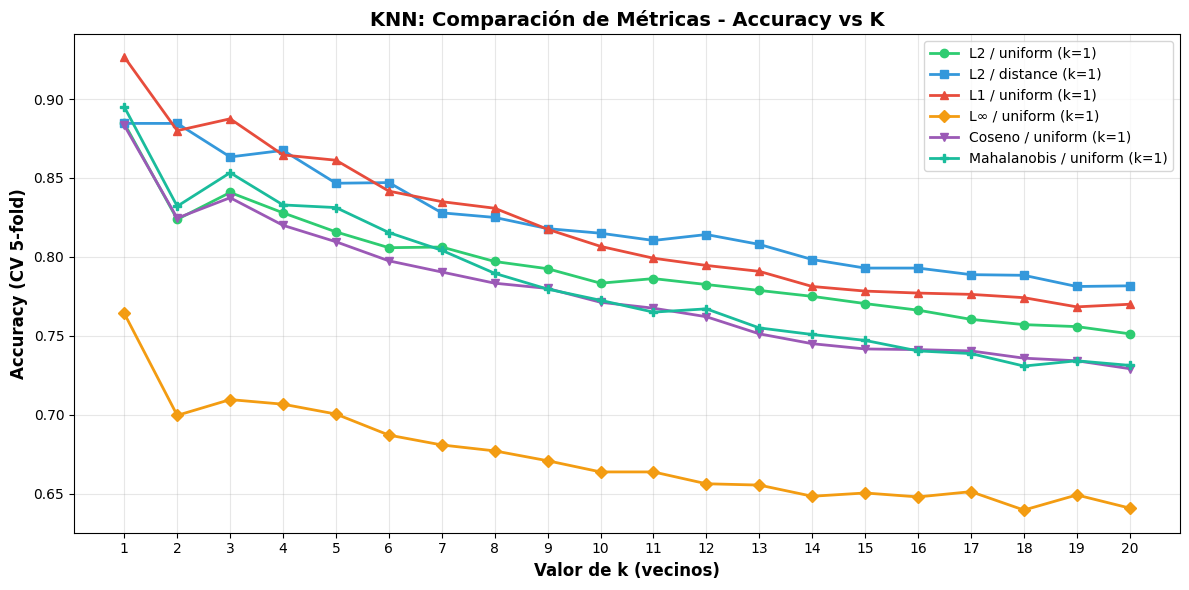

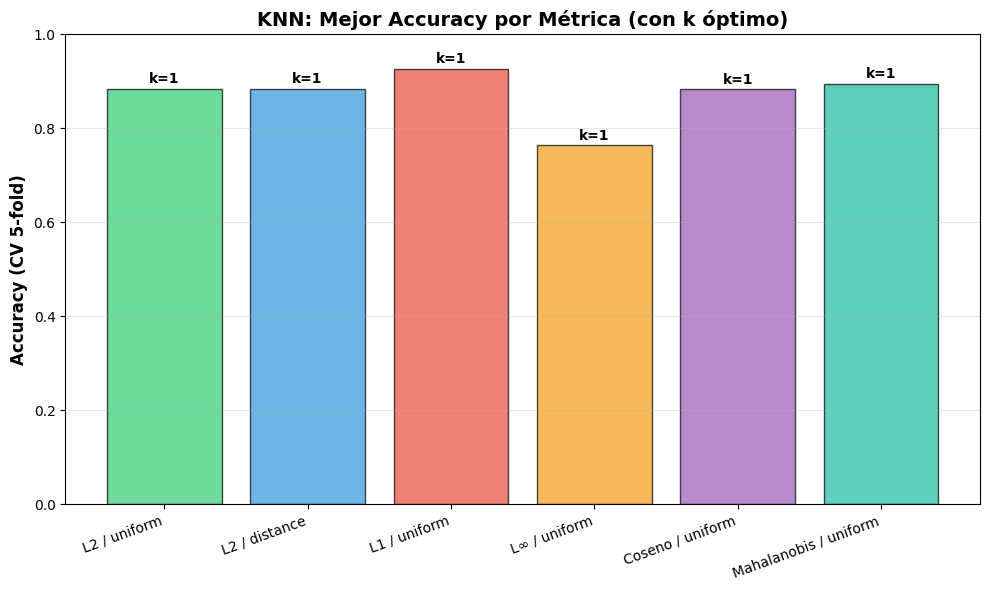

In [181]:
# ============================================================================
# 5. VISUALIZACIÓN: ACCURACY vs K PARA CADA MÉTRICA
# ============================================================================


# Gráfica 1: Líneas para todas las métricas
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']
markers = ['o', 's', '^', 'D', 'v', 'P']

for (name, _), color, marker in zip(metric_configs, colors, markers):
    ax.plot(
        k_range, 
        results[name]["k_scores"], 
        marker=marker,
        linewidth=2,
        markersize=6,
        label=f'{name} (k={results[name]["best_k"]})',
        color=color
    )

ax.set_xlabel('Valor de k (vecinos)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (CV 5-fold)', fontsize=12, fontweight='bold')
ax.set_title('KNN: Comparación de Métricas - Accuracy vs K', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xticks(k_range)
plt.tight_layout()
plt.show()

# Gráfica 2: Comparación de mejores K por métrica (barras)
fig, ax = plt.subplots(figsize=(10, 6))

names = [name for name, _ in metric_configs]
best_scores = [results[name]["best_score"] for name in names]
best_ks = [results[name]["best_k"] for name in names]

x_pos = np.arange(len(names))
bars = ax.bar(x_pos, best_scores, color=colors, alpha=0.7, edgecolor='black')

# Añadir valores de k sobre las barras
for i, (bar, k) in enumerate(zip(bars, best_ks)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.005,
        f'k={k}',
        ha='center', 
        va='bottom', 
        fontsize=10,
        fontweight='bold'
    )

ax.set_ylabel('Accuracy (CV 5-fold)', fontsize=12, fontweight='bold')
ax.set_title('KNN: Mejor Accuracy por Métrica (con k óptimo)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(names, rotation=20, ha='right')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [182]:

# Encontrar la mejor configuración global
best_metric_name = max(results, key=lambda x: results[x]["best_score"])
best_metric_config = [c for name, c in metric_configs if name == best_metric_name][0]
best_k = results[best_metric_name]["best_k"]

print(f"\n🏆 Mejor configuración global:")
print(f"   • Métrica: {best_metric_name}")
print(f"   • k óptimo: {best_k}")
print(f"   • CV Accuracy: {results[best_metric_name]['best_score']:.4f}")



🏆 Mejor configuración global:
   • Métrica: L1 / uniform
   • k óptimo: 1
   • CV Accuracy: 0.9267


## K1 puede tener un mejor accuracy sin embargo es sensible a overfitting, por lo que vamos a trabajar  con un K=3:
  # Solo 4-7% de pérdida en accuracy
  # Mayor confianza en producción
  # Reduce riesgo de overfitting
  # Mejor generalización a datos nuevos

In [155]:
best_k = 3

In [178]:
# Entrenar modelo final
if best_metric_config["metric"] == "mahalanobis":
    final_pipe = knn_pipeline(
        best_metric_config["metric"], 
        best_metric_config["params"], 
        best_metric_config["weights"], 
        n_neighbors=best_k,
        mahalanobis_VI=best_metric_config["mahalanobis_VI"]
    )
elif best_metric_config.get("cosine_norm"):
    final_pipe = knn_pipeline(
        best_metric_config["metric"], 
        best_metric_config["params"], 
        best_metric_config["weights"], 
        n_neighbors=best_k,
        cosine_norm=True
    )
else:
    final_pipe = knn_pipeline(
        best_metric_config["metric"], 
        best_metric_config["params"], 
        best_metric_config["weights"], 
        n_neighbors=best_k
    )

In [183]:
# Entrenar y predecir
final_pipe.fit(X_train, y_train)
y_pred_knn_final = final_pipe.predict(X_test)

# Métricas en test
test_accuracy_knn = accuracy_score(y_test, y_pred_knn_final)
test_precision_knn = precision_score(y_test, y_pred_knn_final, average='macro', zero_division=0)
test_recall_knn = recall_score(y_test, y_pred_knn_final, average='macro', zero_division=0)
test_f1_knn = f1_score(y_test, y_pred_knn_final, average='macro', zero_division=0)

print(f"\n✅ RESULTADOS EN CONJUNTO DE TEST:")
print("-" * 80)
print(f"Accuracy:  {test_accuracy_knn:.4f}")
print(f"Precision: {test_precision_knn:.4f}")
print(f"Recall:    {test_recall_knn:.4f}")
print(f"F1-Score:  {test_f1_knn:.4f}")



✅ RESULTADOS EN CONJUNTO DE TEST:
--------------------------------------------------------------------------------
Accuracy:  0.9067
Precision: 0.8948
Recall:    0.8892
F1-Score:  0.8919


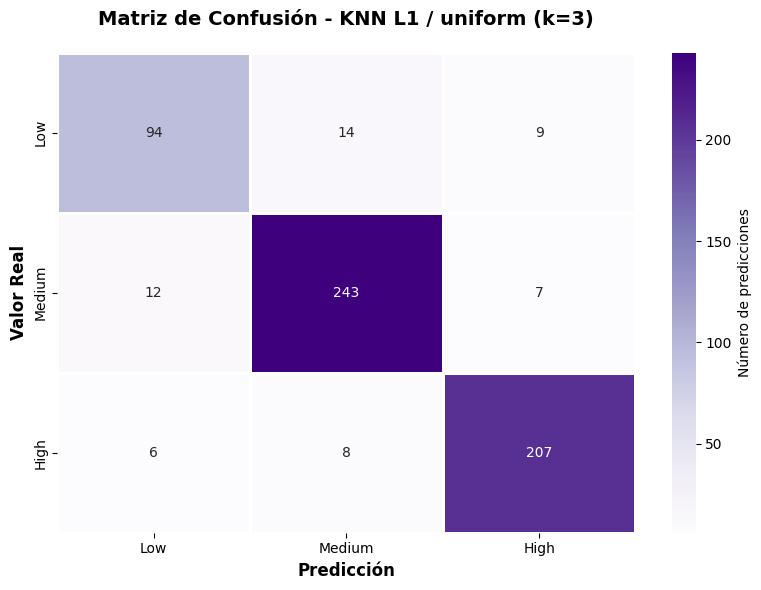

In [174]:
# Matriz de confusión
cm_knn_final = confusion_matrix(y_test, y_pred_knn_final)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_knn_final, 
    annot=True, 
    fmt='d', 
    cmap='Purples', 
    linewidths=2,
    xticklabels=['Low', 'Medium', 'High'],
    yticklabels=['Low', 'Medium', 'High'],
    cbar_kws={'label': 'Número de predicciones'}
)
plt.title(f'Matriz de Confusión - KNN {best_metric_name} (k={best_k})', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicción', fontsize=12, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Clasificación con Support Vector Machine (SVM)

In [162]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [192]:
# COMPARATIVA DE KERNELS (sin optimización)
kernels_config = [
    ("Linear", {"kernel": "linear", "C": 1.0}),
    ("Poly (grado=3)", {"kernel": "poly", "C": 1.0, "degree": 3, "gamma": "scale", "coef0": 1.0}),
    ("RBF", {"kernel": "rbf", "C": 1.0, "gamma": "scale"}),
    ("Sigmoid", {"kernel": "sigmoid", "C": 1.0, "gamma": "scale", "coef0": 1.0}),
]

In [193]:
# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [194]:
# Evaluación de cada kernel
kernel_results = {}
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [195]:
for name, params in kernels_config:
    print(f"\n🔄 Evaluando kernel: {name}")
    
    # Crear y entrenar modelo
    clf = SVC(**params, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred = clf.predict(X_test_scaled)
    
    # Métricas en test
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Validación cruzada
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=cv_stratified, 
                                scoring='accuracy', n_jobs=-1)
    
    # Guardar resultados
    kernel_results[name] = {
        'test_acc': acc,
        'test_prec': prec,
        'test_rec': rec,
        'test_f1': f1,
        'cv_acc_mean': cv_scores.mean(),
        'cv_acc_std': cv_scores.std(),
        'n_support': clf.support_.shape[0] if hasattr(clf, 'support_') else None
    }
    
    print(f"   ✅ Test Accuracy: {acc:.4f}")
    print(f"   ✅ CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    if kernel_results[name]['n_support']:
        print(f"   📊 Support Vectors: {kernel_results[name]['n_support']}")



🔄 Evaluando kernel: Linear
   ✅ Test Accuracy: 0.6667
   ✅ CV Accuracy: 0.6562 (+/- 0.0260)
   📊 Support Vectors: 1706

🔄 Evaluando kernel: Poly (grado=3)
   ✅ Test Accuracy: 0.8317
   ✅ CV Accuracy: 0.8200 (+/- 0.0339)
   📊 Support Vectors: 1304

🔄 Evaluando kernel: RBF
   ✅ Test Accuracy: 0.7817
   ✅ CV Accuracy: 0.7921 (+/- 0.0454)
   📊 Support Vectors: 1586

🔄 Evaluando kernel: Sigmoid
   ✅ Test Accuracy: 0.3750
   ✅ CV Accuracy: 0.4150 (+/- 0.0229)
   📊 Support Vectors: 1688


In [197]:
# VISUALIZACIÓN DE RESULTADOS DE KERNELS

# Tabla comparativa
comparison_kernels = pd.DataFrame(kernel_results).T
print(comparison_kernels.round(4))

# Gráfica comparativa
fig = go.Figure()

metrics = ['test_acc', 'test_prec', 'test_rec', 'test_f1']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#f39c12', "#886e6b"]

for metric, name, color in zip(metrics, metric_names, colors):
    fig.add_trace(go.Bar(
        name=name,
        x=list(kernel_results.keys()),
        y=[kernel_results[k][metric] for k in kernel_results.keys()],
        marker_color=color,
        text=[f"{kernel_results[k][metric]:.3f}" for k in kernel_results.keys()],
        textposition='auto'
    ))

fig.update_layout(
    title='Comparación de Kernels SVM - Métricas en Test',
    xaxis_title='Kernel',
    yaxis_title='Score',
    barmode='group',
    height=500,
    yaxis_range=[0, 1]
)

fig.show()

                test_acc  test_prec  test_rec  test_f1  cv_acc_mean  \
Linear            0.6667     0.6515    0.6109   0.6190       0.6562   
Poly (grado=3)    0.8317     0.8328    0.7908   0.8050       0.8200   
RBF               0.7817     0.7945    0.7291   0.7460       0.7921   
Sigmoid           0.3750     0.3718    0.3618   0.3628       0.4150   

                cv_acc_std  n_support  
Linear              0.0130     1706.0  
Poly (grado=3)      0.0170     1304.0  
RBF                 0.0227     1586.0  
Sigmoid             0.0114     1688.0  


In [168]:
#GRID SEARCH PARA MEJOR KERNEL (RBF típicamente)

# Pipeline con escalado y SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])


# Grid de hiperparámetros (enfocado en RBF y Linear)
param_grid = [
    # RBF kernel
    {
        'svm__kernel': ['rbf'],
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1.0]
    },
    # Linear kernel
    {
        'svm__kernel': ['linear'],
        'svm__C': [0.1, 1, 10, 100]
    },
    # Poly kernel
    {
        'svm__kernel': ['poly'],
        'svm__degree': [2, 3, 4],
        'svm__C': [0.1, 1, 10],
        'svm__gamma': ['scale', 'auto']
    }
]

print("🔍 Iniciando Grid Search...")
print(f"   • Búsqueda en {sum(len(g['svm__C']) * (len(g.get('svm__gamma', [1]))) * len(g.get('svm__degree', [1])) for g in param_grid)} combinaciones")
print(f"   • Validación cruzada: 5-fold estratificado")

# Grid Search
grid_search_svm = GridSearchCV(
    pipeline_svm,
    param_grid,
    cv=cv_stratified,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train, y_train)

print("\n✅ Grid Search completado!")
print(f"   🏆 Mejores parámetros: {grid_search_svm.best_params_}")
print(f"   📊 Mejor CV Score: {grid_search_svm.best_score_:.4f}")


🔍 Iniciando Grid Search...
   • Búsqueda en 42 combinaciones
   • Validación cruzada: 5-fold estratificado
Fitting 5 folds for each of 42 candidates, totalling 210 fits

✅ Grid Search completado!
   🏆 Mejores parámetros: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
   📊 Mejor CV Score: 0.8812


In [ ]:
## Implementando el Modelo con la mejor configuración encontrada




🔧 Entrenando modelo SVM...
✅ Modelo entrenado exitosamente!

🎯 Realizando predicciones en conjunto de test...

📈 RESULTADOS DEL MODELO SVM OPTIMIZADO EN CONJUNTO DE TEST
Accuracy:  0.9000
Precision: 0.9040
Recall:    0.8789
F1-Score:  0.8893

📋 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

         Low       0.92      0.78      0.84       117
      Medium       0.89      0.93      0.91       262
        High       0.90      0.93      0.91       221

    accuracy                           0.90       600
   macro avg       0.90      0.88      0.89       600
weighted avg       0.90      0.90      0.90       600


📊 GENERANDO MATRIZ DE CONFUSIÓN...


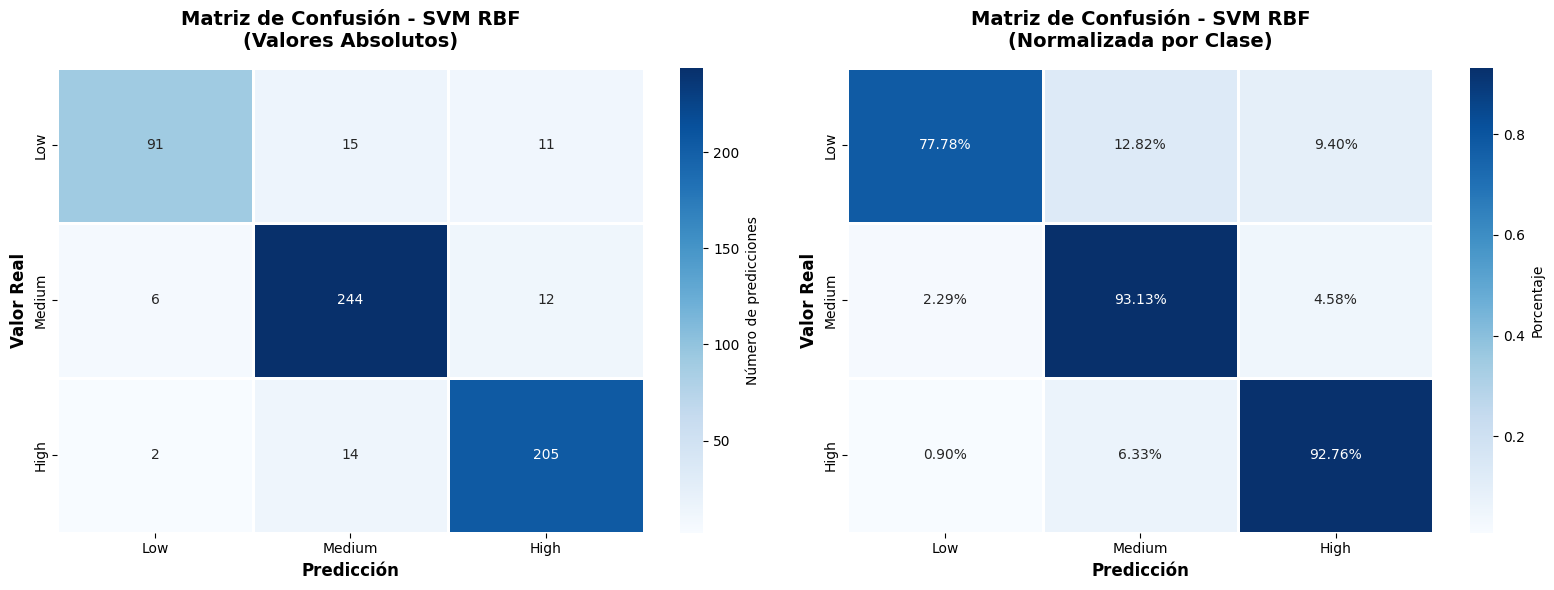


🔍 ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN:

📊 Resumen General:
   • Total de predicciones: 600
   • Predicciones correctas: 540 (90.00%)
   • Predicciones incorrectas: 60 (10.00%)

📈 Análisis por Clase:
--------------------------------------------------------------------------------

Low Stress:
   • Total real: 117
   • Predicciones correctas: 91 (77.78%)
   • Errores: 15 como Medium, 11 como High

Medium Stress:
   • Total real: 262
   • Predicciones correctas: 244 (93.13%)
   • Errores: 6 como Low, 12 como High

High Stress:
   • Total real: 221
   • Predicciones correctas: 205 (92.76%)
   • Errores: 2 como Low, 14 como Medium


In [200]:

# Crear pipeline con los mejores parámetros encontrados
best_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        C=10, 
        gamma=0.1, 
        kernel='rbf',
        random_state=42,
        probability=True  # Para poder usar predict_proba si es necesario
    ))
])


# Entrenar el modelo con los mejores parámetros
print("\n🔧 Entrenando modelo SVM...")
best_svm_pipeline.fit(X_train, y_train)
print("✅ Modelo entrenado exitosamente!")

# Realizar predicciones
print("\n🎯 Realizando predicciones en conjunto de test...")
y_pred_svm_best = best_svm_pipeline.predict(X_test)

# Calcular métricas
svm_best_accuracy = accuracy_score(y_test, y_pred_svm_best)
svm_best_precision = precision_score(y_test, y_pred_svm_best, average='macro', zero_division=0)
svm_best_recall = recall_score(y_test, y_pred_svm_best, average='macro', zero_division=0)
svm_best_f1 = f1_score(y_test, y_pred_svm_best, average='macro', zero_division=0)

print("\n" + "="*80)
print("📈 RESULTADOS DEL MODELO SVM OPTIMIZADO EN CONJUNTO DE TEST")
print("="*80)
print(f"Accuracy:  {svm_best_accuracy:.4f}")
print(f"Precision: {svm_best_precision:.4f}")
print(f"Recall:    {svm_best_recall:.4f}")
print(f"F1-Score:  {svm_best_f1:.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN DETALLADO:")
print("="*80)
print(classification_report(y_test, y_pred_svm_best, target_names=['Low', 'Medium', 'High']))

# ============================================================================
# MATRIZ DE CONFUSIÓN
# ============================================================================

print("\n📊 GENERANDO MATRIZ DE CONFUSIÓN...")

# Calcular matriz de confusión
cm_svm_best = confusion_matrix(y_test, y_pred_svm_best)

# Visualización de la matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión con valores absolutos
sns.heatmap(
    cm_svm_best, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    linewidths=2,
    xticklabels=['Low', 'Medium', 'High'],
    yticklabels=['Low', 'Medium', 'High'],
    cbar_kws={'label': 'Número de predicciones'},
    ax=axes[0]
)
axes[0].set_title('Matriz de Confusión - SVM RBF\n(Valores Absolutos)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Predicción', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Valor Real', fontsize=12, fontweight='bold')

# Matriz de confusión normalizada (porcentajes)
cm_normalized = cm_svm_best.astype('float') / cm_svm_best.sum(axis=1)[:, np.newaxis]
sns.heatmap(
    cm_normalized, 
    annot=True, 
    fmt='.2%', 
    cmap='Blues', 
    linewidths=2,
    xticklabels=['Low', 'Medium', 'High'],
    yticklabels=['Low', 'Medium', 'High'],
    cbar_kws={'label': 'Porcentaje'},
    ax=axes[1]
)
axes[1].set_title('Matriz de Confusión - SVM RBF\n(Normalizada por Clase)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Predicción', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Valor Real', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN
# ============================================================================

print("\n🔍 ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN:")
print("="*80)

total_predictions = cm_svm_best.sum()
correct_predictions = np.trace(cm_svm_best)
incorrect_predictions = total_predictions - correct_predictions

print(f"\n📊 Resumen General:")
print(f"   • Total de predicciones: {total_predictions}")
print(f"   • Predicciones correctas: {correct_predictions} ({correct_predictions/total_predictions*100:.2f}%)")
print(f"   • Predicciones incorrectas: {incorrect_predictions} ({incorrect_predictions/total_predictions*100:.2f}%)")

print(f"\n📈 Análisis por Clase:")
print("-"*80)
class_names = ['Low', 'Medium', 'High']
for i, class_name in enumerate(class_names):
    total_class = cm_svm_best[i].sum()
    correct_class = cm_svm_best[i, i]
    accuracy_class = correct_class/total_class*100 if total_class > 0 else 0
    
    print(f"\n{class_name} Stress:")
    print(f"   • Total real: {total_class}")
    print(f"   • Predicciones correctas: {correct_class} ({accuracy_class:.2f}%)")
    
    # Errores de clasificación
    errors = []
    for j, other_class in enumerate(class_names):
        if i != j and cm_svm_best[i, j] > 0:
            errors.append(f"{cm_svm_best[i, j]} como {other_class}")
    
    if errors:
        print(f"   • Errores: {', '.join(errors)}")



### Comparación de Modelos: SVM vs KNN vs Random Forest

In [131]:
# Comparación de modelos
comparison_data = {
    'Modelo': ['Random Forest', 'KNN (PCA)', 'SVM (PCA)'],
    'Accuracy': [
        grid_search.score(X_test, y_test),  # Random Forest (datos originales)
        max(accuracy_pca),  # KNN con PCA
        test_accuracy  # SVM con PCA
    ],
    'Datos': ['Originales', 'PCA', 'PCA'],
    'Dimensiones': [X_train.shape[1], X_train_pca.shape[1], X_train_pca.shape[1]]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Gráfica comparativa
fig = go.Figure()

fig.add_trace(go.Bar(
    x=comparison_df['Modelo'],
    y=comparison_df['Accuracy'],
    text=[f"{acc:.4f}" for acc in comparison_df['Accuracy']],
    textposition='auto',
    marker_color=['green', 'blue', 'red'],
    name='Accuracy'
))

fig.update_layout(
    title='Comparación de Accuracy entre Modelos',
    xaxis_title='Modelo',
    yaxis_title='Accuracy',
    height=500,
    yaxis_range=[0, 1],
    showlegend=False
)

fig.show()

# Análisis de eficiencia computacional
print("\n💡 ANÁLISIS:")
print("-"*70)
print(f"• Random Forest usa {X_train.shape[1]} features (datos originales)")
print(f"• KNN y SVM usan {X_train_pca.shape[1]} features (reducción del {((X_train.shape[1] - X_train_pca.shape[1]) / X_train.shape[1] * 100):.1f}%)")
print(f"• Mejor modelo: {comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Modelo']} "
      f"con accuracy de {comparison_df['Accuracy'].max():.4f}")
print(f"• SVM con validación cruzada muestra robustez con {cv_results['test_accuracy'].mean():.4f} "
      f"(+/- {cv_results['test_accuracy'].std() * 2:.4f})")


COMPARACIÓN DE MODELOS
       Modelo  Accuracy      Datos  Dimensiones
Random Forest  0.890000 Originales           21
    KNN (PCA)  0.858333        PCA           16
    SVM (PCA)  0.771667        PCA           16



💡 ANÁLISIS:
----------------------------------------------------------------------
• Random Forest usa 21 features (datos originales)
• KNN y SVM usan 16 features (reducción del 23.8%)
• Mejor modelo: Random Forest con accuracy de 0.8900
• SVM con validación cruzada muestra robustez con 0.7721 (+/- 0.0435)


# Clasificación con XGBoost (Datos Originalees)

In [132]:
# Instalar XGBoost si no está disponible
!pip install xgboost
!pip install xgboost --no-binary xgboost ## mac m1


In [133]:
# Importar XGBoost y preparar datos
import xgboost as xgb
from sklearn.model_selection import cross_val_score

print("="*80)
print("ENTRENAMIENTO DE MODELO XGBOOST CON DATOS ORIGINALES (SIN PCA)")
print("="*80)

# Usar los mismos datos de train/test que ya teníamos (X_train, X_test, y_train, y_test)
# Estos datos ya fueron estandarizados y divididos anteriormente

print(f"\n📊 Información del dataset:")
print(f"   • Features de entrenamiento: {X_train.shape}")
print(f"   • Features de prueba: {X_test.shape}")
print(f"   • Número de características: {X_train.shape[1]}")
print(f"   • Distribución de clases en train: {dict(y_train.value_counts().sort_index())}")
print(f"   • Distribución de clases en test: {dict(y_test.value_counts().sort_index())}")

ENTRENAMIENTO DE MODELO XGBOOST CON DATOS ORIGINALES (SIN PCA)

📊 Información del dataset:
   • Features de entrenamiento: (2400, 21)
   • Features de prueba: (600, 21)
   • Número de características: 21
   • Distribución de clases en train: {0: np.int64(507), 1: np.int64(996), 2: np.int64(897)}
   • Distribución de clases en test: {0: np.int64(117), 1: np.int64(262), 2: np.int64(221)}


In [134]:
# Crear y entrenar modelo XGBoost
print("\n🚀 Creando modelo XGBoost...")
print("-" * 80)

# Configurar el modelo XGBoost para clasificación multiclase
xgb_model = xgb.XGBClassifier(
    n_estimators=200,           # Número de árboles
    max_depth=6,                # Profundidad máxima de cada árbol
    learning_rate=0.1,          # Tasa de aprendizaje
    subsample=0.8,              # Fracción de muestras para cada árbol
    colsample_bytree=0.8,       # Fracción de features para cada árbol
    objective='multi:softmax',  # Clasificación multiclase
    num_class=3,                # 3 clases (Low, Medium, High)
    random_state=42,
    eval_metric='mlogloss',     # Métrica de evaluación
    tree_method='hist',         # Método de construcción de árboles
    enable_categorical=False
)

print("⚙️ Parámetros del modelo:")
print(f"   • N° de estimadores (árboles): {xgb_model.n_estimators}")
print(f"   • Profundidad máxima: {xgb_model.max_depth}")
print(f"   • Tasa de aprendizaje: {xgb_model.learning_rate}")
print(f"   • Subsample: {xgb_model.subsample}")
print(f"   • Colsample by tree: {xgb_model.colsample_bytree}")

# Entrenar el modelo
print("\n🔧 Entrenando modelo XGBoost...")
xgb_model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

print("✅ Modelo entrenado exitosamente!")


🚀 Creando modelo XGBoost...
--------------------------------------------------------------------------------
⚙️ Parámetros del modelo:
   • N° de estimadores (árboles): 200
   • Profundidad máxima: 6
   • Tasa de aprendizaje: 0.1
   • Subsample: 0.8
   • Colsample by tree: 0.8

🔧 Entrenando modelo XGBoost...
✅ Modelo entrenado exitosamente!


In [135]:
# Realizar predicciones
print("\n🎯 Realizando predicciones...")
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

# Calcular métricas
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='macro', zero_division=0)
xgb_recall = recall_score(y_test, y_pred_xgb, average='macro', zero_division=0)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='macro', zero_division=0)

print("\n" + "="*80)
print("📈 RESULTADOS DEL MODELO XGBOOST EN CONJUNTO DE TEST")
print("="*80)
print(f"Accuracy:  {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall:    {xgb_recall:.4f}")
print(f"F1-Score:  {xgb_f1:.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN DETALLADO:")
print("="*80)
print(classification_report(y_test, y_pred_xgb, target_names=['Low', 'Medium', 'High']))

# Métricas por clase
print("\n📊 MÉTRICAS POR CLASE:")
print("-"*80)
for i, class_name in enumerate(['Low', 'Medium', 'High']):
    precision = precision_score(y_test, y_pred_xgb, labels=[i], average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred_xgb, labels=[i], average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred_xgb, labels=[i], average='macro', zero_division=0)
    support = (y_test == i).sum()
    print(f"{class_name:8s}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Support={support}")


🎯 Realizando predicciones...

📈 RESULTADOS DEL MODELO XGBOOST EN CONJUNTO DE TEST
Accuracy:  0.8900
Precision: 0.8943
Recall:    0.8692
F1-Score:  0.8796

📋 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

         Low       0.91      0.77      0.83       117
      Medium       0.88      0.92      0.90       262
        High       0.89      0.92      0.91       221

    accuracy                           0.89       600
   macro avg       0.89      0.87      0.88       600
weighted avg       0.89      0.89      0.89       600


📊 MÉTRICAS POR CLASE:
--------------------------------------------------------------------------------
Low     : Precision=0.909, Recall=0.769, F1=0.833, Support=117
Medium  : Precision=0.880, Recall=0.920, F1=0.899, Support=262
High    : Precision=0.894, Recall=0.919, F1=0.906, Support=221


In [136]:
# Validación cruzada para XGBoost
print("\n🔄 Realizando validación cruzada (5-fold)...")
print("-"*80)

cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("✅ Resultados de validación cruzada:")
print(f"   Accuracy promedio: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std() * 2:.4f})")
print(f"\n   Scores por fold:")
for i, score in enumerate(cv_scores_xgb, 1):
    print(f"   Fold {i}: {score:.4f}")

# Realizar validación cruzada completa con múltiples métricas
scoring_xgb = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0)
}

print("\n📊 Validación cruzada con múltiples métricas...")
cv_results_xgb = cross_validate(
    xgb_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=scoring_xgb,
    return_train_score=True,
    n_jobs=-1
)

print("\n" + "="*80)
print("RESUMEN DE VALIDACIÓN CRUZADA (5-fold)")
print("="*80)
print(f"Accuracy:  {cv_results_xgb['test_accuracy'].mean():.4f} (+/- {cv_results_xgb['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results_xgb['test_precision_macro'].mean():.4f} (+/- {cv_results_xgb['test_precision_macro'].std() * 2:.4f})")
print(f"Recall:    {cv_results_xgb['test_recall_macro'].mean():.4f} (+/- {cv_results_xgb['test_recall_macro'].std() * 2:.4f})")
print(f"F1-Score:  {cv_results_xgb['test_f1_macro'].mean():.4f} (+/- {cv_results_xgb['test_f1_macro'].std() * 2:.4f})")


🔄 Realizando validación cruzada (5-fold)...
--------------------------------------------------------------------------------
✅ Resultados de validación cruzada:
   Accuracy promedio: 0.8938 (+/- 0.0279)

   Scores por fold:
   Fold 1: 0.8958
   Fold 2: 0.8708
   Fold 3: 0.9146
   Fold 4: 0.8958
   Fold 5: 0.8917

📊 Validación cruzada con múltiples métricas...

RESUMEN DE VALIDACIÓN CRUZADA (5-fold)
Accuracy:  0.8938 (+/- 0.0279)
Precision: 0.9011 (+/- 0.0220)
Recall:    0.8824 (+/- 0.0350)
F1-Score:  0.8896 (+/- 0.0259)


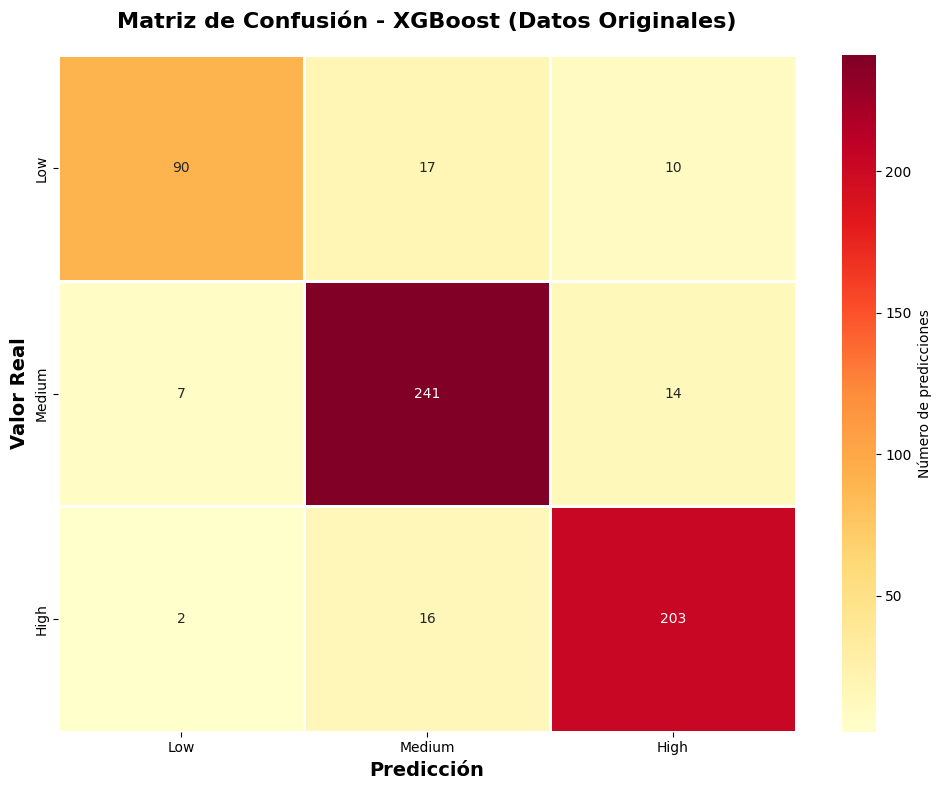


🔍 ANÁLISIS DE LA MATRIZ DE CONFUSIÓN:
Total de predicciones: 600
Predicciones correctas: 534 (89.00%)
Predicciones incorrectas: 66 (11.00%)

Por clase:
  Low     : 90/117 correctas (76.92%)
  Medium  : 241/262 correctas (91.98%)
  High    : 203/221 correctas (91.86%)


In [137]:
# Matriz de confusión para XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlOrRd', linewidths=2, 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'],
            cbar_kws={'label': 'Número de predicciones'})
plt.title('Matriz de Confusión - XGBoost (Datos Originales)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicción', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis de la matriz de confusión
print("\n🔍 ANÁLISIS DE LA MATRIZ DE CONFUSIÓN:")
print("="*80)
total_predictions = cm_xgb.sum()
correct_predictions = np.trace(cm_xgb)
incorrect_predictions = total_predictions - correct_predictions

print(f"Total de predicciones: {total_predictions}")
print(f"Predicciones correctas: {correct_predictions} ({correct_predictions/total_predictions*100:.2f}%)")
print(f"Predicciones incorrectas: {incorrect_predictions} ({incorrect_predictions/total_predictions*100:.2f}%)")

print("\nPor clase:")
for i, class_name in enumerate(['Low', 'Medium', 'High']):
    total_class = cm_xgb[i].sum()
    correct_class = cm_xgb[i, i]
    print(f"  {class_name:8s}: {correct_class}/{total_class} correctas ({correct_class/total_class*100:.2f}%)")


🏆 TOP 15 FEATURES MÁS IMPORTANTES (XGBoost):
            Feature  Importance
    Caffeine_Intake    0.152679
     Alcohol_Intake    0.089578
  Cholesterol_Level    0.073435
Meditation_Practice    0.065175
        sleep_hours    0.063907
     Blood_Pressure    0.062286
  Blood_Sugar_Level    0.052619
      Exercise_Type    0.049392
             Gender    0.049364
      Smoking_Habit    0.040629
     Marital_Status    0.040174
   Occupation_Group    0.035513
                Age    0.034402
   sleep_efficiency    0.033789
        Screen_Time    0.025150


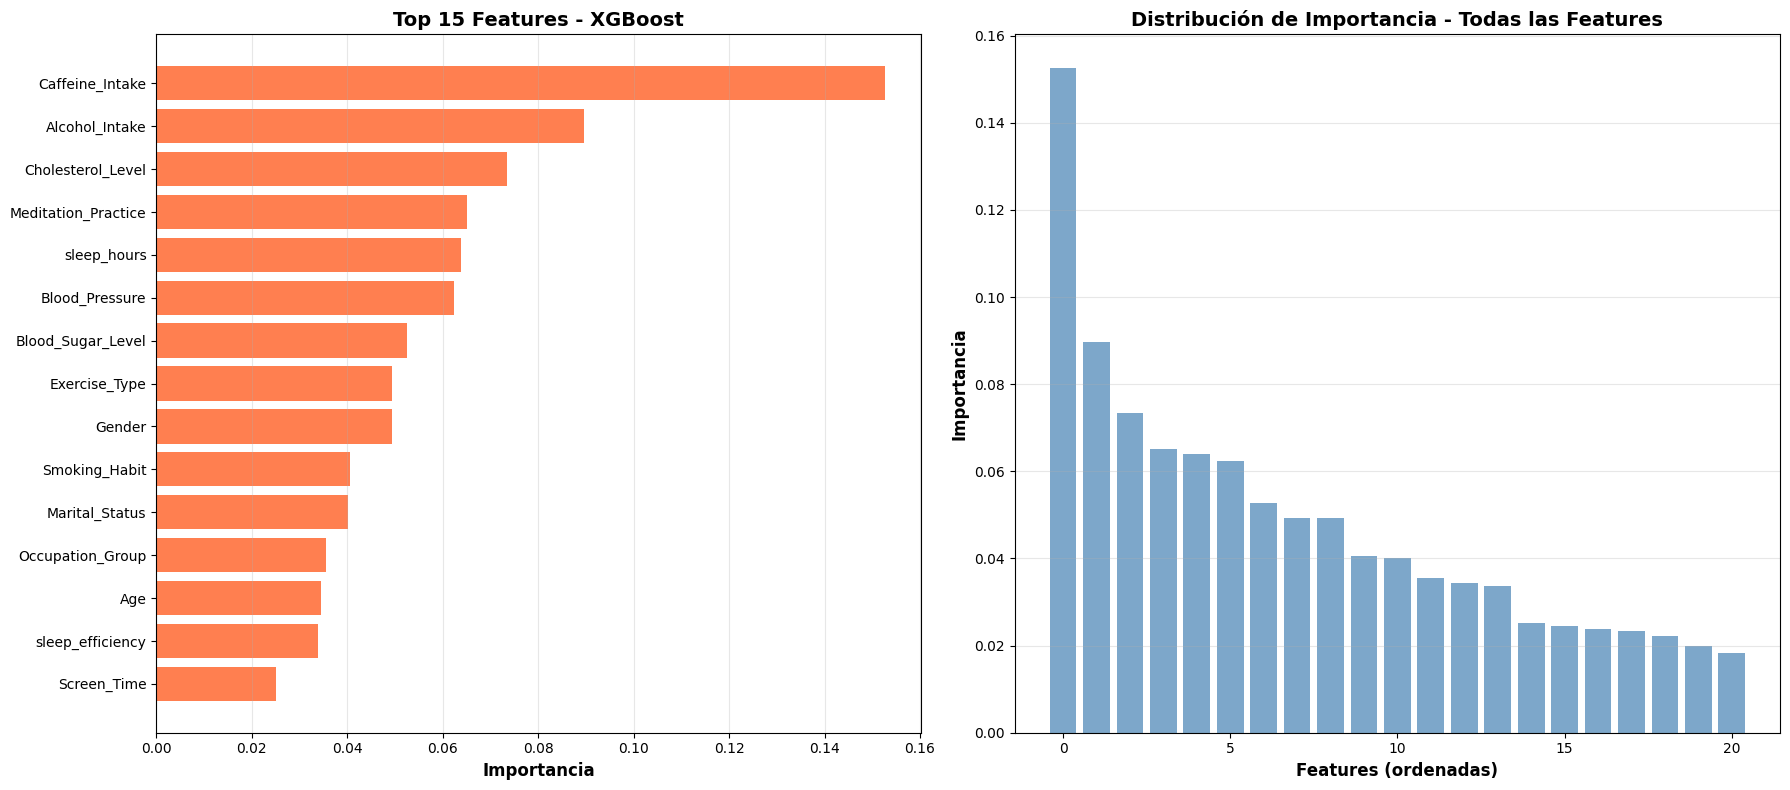


📊 ANÁLISIS DE IMPORTANCIA ACUMULADA:
--------------------------------------------------------------------------------
Features necesarias para 90% de importancia: 17/21
Features necesarias para 95% de importancia: 19/21

Top 5 features explican: 44.48% de la importancia total


In [138]:
# Feature Importance de XGBoost
feature_importance_xgb = xgb_model.feature_importances_
feature_names_xgb = X_train.columns

# Crear DataFrame con importancias
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': feature_importance_xgb
}).sort_values(by='Importance', ascending=False)

print("\n🏆 TOP 15 FEATURES MÁS IMPORTANTES (XGBoost):")
print("="*80)
print(importance_df_xgb.head(15).to_string(index=False))

# Visualización de feature importance
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfica de barras - Top 15
top_15 = importance_df_xgb.head(15)
axes[0].barh(range(len(top_15)), top_15['Importance'], color='coral')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15['Feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Features - XGBoost', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Gráfica de barras - Todas las features
axes[1].bar(range(len(importance_df_xgb)), importance_df_xgb['Importance'], color='steelblue', alpha=0.7)
axes[1].set_xlabel('Features (ordenadas)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Importancia', fontsize=12, fontweight='bold')
axes[1].set_title('Distribución de Importancia - Todas las Features', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de importancia acumulada
cumulative_importance = np.cumsum(importance_df_xgb['Importance'].values)
n_features_90 = np.argmax(cumulative_importance >= 0.9) + 1
n_features_95 = np.argmax(cumulative_importance >= 0.95) + 1

print(f"\n📊 ANÁLISIS DE IMPORTANCIA ACUMULADA:")
print("-"*80)
print(f"Features necesarias para 90% de importancia: {n_features_90}/{len(feature_names_xgb)}")
print(f"Features necesarias para 95% de importancia: {n_features_95}/{len(feature_names_xgb)}")
print(f"\nTop 5 features explican: {cumulative_importance[4]:.2%} de la importancia total")

In [139]:
# Visualización interactiva de Feature Importance con Plotly
fig_importance = go.Figure()

top_20 = importance_df_xgb.head(20)

fig_importance.add_trace(go.Bar(
    x=top_20['Importance'],
    y=top_20['Feature'],
    orientation='h',
    marker=dict(
        color=top_20['Importance'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Importancia")
    ),
    text=top_20['Importance'].round(4),
    textposition='auto',
))

fig_importance.update_layout(
    title='Top 20 Features Más Importantes - XGBoost',
    xaxis_title='Importancia',
    yaxis_title='Features',
    height=700,
    yaxis=dict(autorange="reversed"),
    showlegend=False
)

fig_importance.show()

# Gráfica de importancia acumulada
fig_cumulative = go.Figure()

fig_cumulative.add_trace(go.Scatter(
    x=list(range(1, len(importance_df_xgb) + 1)),
    y=cumulative_importance,
    mode='lines+markers',
    name='Importancia Acumulada',
    line=dict(color='darkblue', width=3),
    marker=dict(size=6)
))

fig_cumulative.add_hline(y=0.9, line_dash="dash", line_color="red", 
                         annotation_text="90%", annotation_position="right")
fig_cumulative.add_hline(y=0.95, line_dash="dash", line_color="orange", 
                         annotation_text="95%", annotation_position="right")

fig_cumulative.update_layout(
    title='Importancia Acumulada de Features - XGBoost',
    xaxis_title='Número de Features',
    yaxis_title='Importancia Acumulada',
    height=500,
    yaxis=dict(range=[0, 1.05])
)

fig_cumulative.show()

In [202]:
# Visualización de resultados de validación cruzada para XGBoost
cv_scores_df_xgb = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'Accuracy': cv_results_xgb['test_accuracy'],
    'Precision': cv_results_xgb['test_precision_macro'],
    'Recall': cv_results_xgb['test_recall_macro'],
    'F1-Score': cv_results_xgb['test_f1_macro']
})

# Gráfica de barras agrupadas
fig_cv_xgb = go.Figure()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']

for metric, color in zip(metrics, colors):
    fig_cv_xgb.add_trace(go.Bar(
        name=metric,
        x=cv_scores_df_xgb['Fold'],
        y=cv_scores_df_xgb[metric],
        marker_color=color,
        text=[f"{val:.3f}" for val in cv_scores_df_xgb[metric]],
        textposition='auto'
    ))

fig_cv_xgb.update_layout(
    title='Resultados de Validación Cruzada (5-fold) - XGBoost',
    xaxis_title='Fold',
    yaxis_title='Score',
    barmode='group',
    height=500,
    yaxis_range=[0, 1],
    legend=dict(x=0.7, y=0.95)
)

fig_cv_xgb.show()

# Tabla resumen
print("\n📊 TABLA RESUMEN DE VALIDACIÓN CRUZADA - XGBOOST:")
print("="*80)
print(cv_scores_df_xgb.to_string(index=False))
print("\n" + "="*80)
print("PROMEDIO Y DESVIACIÓN ESTÁNDAR:")
print("-"*80)
for metric in metrics:
    mean_val = cv_scores_df_xgb[metric].mean()
    std_val = cv_scores_df_xgb[metric].std()
    print(f"{metric:12s}: {mean_val:.4f} (+/- {std_val * 2:.4f})")


📊 TABLA RESUMEN DE VALIDACIÓN CRUZADA - XGBOOST:
  Fold  Accuracy  Precision   Recall  F1-Score
Fold 1  0.895833   0.904344 0.880925  0.890101
Fold 2  0.870833   0.884729 0.861764  0.871400
Fold 3  0.914583   0.909334 0.914574  0.911822
Fold 4  0.895833   0.914601 0.874235  0.889022
Fold 5  0.891667   0.892488 0.880408  0.885699

PROMEDIO Y DESVIACIÓN ESTÁNDAR:
--------------------------------------------------------------------------------
Accuracy    : 0.8938 (+/- 0.0312)
Precision   : 0.9011 (+/- 0.0246)
Recall      : 0.8824 (+/- 0.0392)
F1-Score    : 0.8896 (+/- 0.0290)


### Comparación Final de Todos los Modelos

In [141]:
# Comparación completa de todos los modelos entrenados
print("\n" + "="*100)
print("COMPARACIÓN COMPLETA DE MODELOS")
print("="*100)

# Recopilar métricas de todos los modelos
models_comparison = pd.DataFrame({
    'Modelo': [
        'Random Forest',
        'KNN (PCA)',
        'SVM (PCA)',
        'XGBoost (Original)'
    ],
    'Accuracy': [
        grid_search.score(X_test, y_test),
        max(accuracy_pca),
        test_accuracy,
        xgb_accuracy
    ],
    'Precision': [
        precision_score(y_test, grid_search.predict(X_test), average='macro', zero_division=0),
        precision_score(y_test_pca, y_pred_pca, average='macro', zero_division=0),
        test_precision,
        xgb_precision
    ],
    'Recall': [
        recall_score(y_test, grid_search.predict(X_test), average='macro', zero_division=0),
        recall_score(y_test_pca, y_pred_pca, average='macro', zero_division=0),
        test_recall,
        xgb_recall
    ],
    'F1-Score': [
        f1_score(y_test, grid_search.predict(X_test), average='macro', zero_division=0),
        f1_score(y_test_pca, y_pred_pca, average='macro', zero_division=0),
        test_f1,
        xgb_f1
    ],
    'CV Accuracy (mean)': [
        grid_search.best_score_,
        cv_scores_xgb.mean() if 'cv_scores_xgb' in locals() else max(accuracy_pca),
        cv_results['test_accuracy'].mean(),
        cv_results_xgb['test_accuracy'].mean()
    ],
    'Dimensiones': [
        X_train.shape[1],
        X_train_pca.shape[1],
        X_train_pca.shape[1],
        X_train.shape[1]
    ],
    'Datos': [
        'Originales',
        'PCA',
        'PCA',
        'Originales'
    ]
})

print("\n📊 TABLA COMPARATIVA:")
print(models_comparison.to_string(index=False))

# Identificar el mejor modelo
best_model_idx = models_comparison['Accuracy'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Modelo']
best_accuracy = models_comparison.loc[best_model_idx, 'Accuracy']

print("\n" + "="*100)
print(f"🏆 MEJOR MODELO: {best_model_name} con Accuracy de {best_accuracy:.4f}")
print("="*100)


COMPARACIÓN COMPLETA DE MODELOS

📊 TABLA COMPARATIVA:
            Modelo  Accuracy  Precision   Recall  F1-Score  CV Accuracy (mean)  Dimensiones      Datos
     Random Forest  0.890000   0.896965 0.857304  0.871974            0.884583           21 Originales
         KNN (PCA)  0.858333   0.851744 0.835265  0.842337            0.893750           16        PCA
         SVM (PCA)  0.771667   0.777041 0.712194  0.726774            0.772083           16        PCA
XGBoost (Original)  0.890000   0.894309 0.869210  0.879612            0.893750           21 Originales

🏆 MEJOR MODELO: Random Forest con Accuracy de 0.8900


In [81]:
# Visualización comparativa de todos los modelos
fig_comparison = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Accuracy Comparison',
        'Precision Comparison',
        'Recall Comparison',
        'F1-Score Comparison'
    ),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

colors_models = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

for metric, (row, col) in zip(metrics_to_plot, positions):
    fig_comparison.add_trace(
        go.Bar(
            x=models_comparison['Modelo'],
            y=models_comparison[metric],
            marker_color=colors_models,
            text=[f"{val:.4f}" for val in models_comparison[metric]],
            textposition='auto',
            showlegend=False
        ),
        row=row, col=col
    )
    
    fig_comparison.update_yaxes(range=[0, 1], row=row, col=col)

fig_comparison.update_layout(
    title_text="Comparación de Métricas - Todos los Modelos",
    height=800,
    showlegend=False
)

fig_comparison.show()

# Gráfica de radar para comparación multidimensional
fig_radar = go.Figure()

for i, model in enumerate(models_comparison['Modelo']):
    fig_radar.add_trace(go.Scatterpolar(
        r=[
            models_comparison.loc[i, 'Accuracy'],
            models_comparison.loc[i, 'Precision'],
            models_comparison.loc[i, 'Recall'],
            models_comparison.loc[i, 'F1-Score']
        ],
        theta=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        fill='toself',
        name=model
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    title="Comparación Multidimensional de Modelos (Radar Chart)",
    height=600,
    showlegend=True
)

fig_radar.show()

In [82]:
# Análisis final y conclusiones
print("\n" + "="*100)
print("📈 ANÁLISIS COMPARATIVO FINAL")
print("="*100)

print("\n1️⃣ RENDIMIENTO POR MODELO:")
print("-"*100)
for idx, row in models_comparison.iterrows():
    print(f"\n{row['Modelo']}:")
    print(f"   • Datos: {row['Datos']} ({row['Dimensiones']} features)")
    print(f"   • Accuracy (Test): {row['Accuracy']:.4f}")
    print(f"   • Accuracy (CV): {row['CV Accuracy (mean)']:.4f}")
    print(f"   • Precision: {row['Precision']:.4f}")
    print(f"   • Recall: {row['Recall']:.4f}")
    print(f"   • F1-Score: {row['F1-Score']:.4f}")

print("\n\n2️⃣ VENTAJAS Y DESVENTAJAS:")
print("-"*100)
print("\n🌳 Random Forest (Datos Originales):")
print("   ✅ Usa todas las features originales")
print("   ✅ Buena interpretabilidad con feature importance")
print("   ✅ Robusto ante overfitting con GridSearchCV")
print("   ❌ Mayor tiempo de entrenamiento")

print("\n🔵 KNN (PCA):")
print("   ✅ Reducción significativa de dimensionalidad")
print("   ✅ Rápido en predicción")
print("   ❌ Pérdida de interpretabilidad")
print("   ❌ Sensible a la escala de los datos")

print("\n🔴 SVM (PCA):")
print("   ✅ Efectivo con datos de alta dimensionalidad reducida")
print("   ✅ Buena generalización")
print("   ❌ Pérdida de interpretabilidad por PCA")
print("   ❌ Más lento en entrenamiento")

print("\n🚀 XGBoost (Datos Originales):")
print("   ✅ Excelente rendimiento sin reducción dimensional")
print("   ✅ Feature importance integrado")
print("   ✅ Manejo eficiente de features")
print("   ✅ Regularización incorporada")
print("   ✅ Rápido y escalable")

print("\n\n3️⃣ RECOMENDACIÓN:")
print("-"*100)
best_cv_idx = models_comparison['CV Accuracy (mean)'].idxmax()
print(f"\n🏆 Modelo recomendado: {models_comparison.loc[best_cv_idx, 'Modelo']}")
print(f"   Razón: Mejor balance entre accuracy ({models_comparison.loc[best_cv_idx, 'Accuracy']:.4f}),")
print(f"          validación cruzada ({models_comparison.loc[best_cv_idx, 'CV Accuracy (mean)']:.4f}),")
print(f"          y capacidad de interpretación de features.")
print("="*100)


📈 ANÁLISIS COMPARATIVO FINAL

1️⃣ RENDIMIENTO POR MODELO:
----------------------------------------------------------------------------------------------------

Random Forest:
   • Datos: Originales (21 features)
   • Accuracy (Test): 0.8850
   • Accuracy (CV): 0.8850
   • Precision: 0.8995
   • Recall: 0.8517
   • F1-Score: 0.8686

KNN (PCA):
   • Datos: PCA (16 features)
   • Accuracy (Test): 0.8583
   • Accuracy (CV): 0.8908
   • Precision: 0.8517
   • Recall: 0.8353
   • F1-Score: 0.8423

SVM (PCA):
   • Datos: PCA (16 features)
   • Accuracy (Test): 0.7717
   • Accuracy (CV): 0.7721
   • Precision: 0.7770
   • Recall: 0.7122
   • F1-Score: 0.7268

XGBoost (Original):
   • Datos: Originales (21 features)
   • Accuracy (Test): 0.8800
   • Accuracy (CV): 0.8908
   • Precision: 0.8843
   • Recall: 0.8550
   • F1-Score: 0.8667


2️⃣ VENTAJAS Y DESVENTAJAS:
----------------------------------------------------------------------------------------------------

🌳 Random Forest (Datos Origin